<a href="https://colab.research.google.com/github/DCel567/DataSeries/blob/main/%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_01_11_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Прогнозирование временных рядов средних температур разных стран с использованием моделей SARIMAX и VAR

# 1. Применение моделей Transformers для прогнозирования временных рядов средней температуры России

В данной работе рассматривается применение моделей Transformers для прогнозирования временных рядов средней температуры в России. Также проводится сравнительный анализ качества прогнозирования с использованием других моделей, таких как SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors), VAR (Vector Autoregression), XGBoost, RNN/GRU, RNN/LSTM, RNN/Bidirectional и гибридные модели (LSTM, GRU, Bidirectional), а также CNN. Для оценки эффективности моделей используются следующие метрики: MAE (Mean Absolute Error), MSE (Mean Squared Error), RMSE (Root Mean Squared Error).

### Описание набора данных

Для анализа используется набор данных, охватывающий информацию по всем странам начиная с 1743 года. Для упрощения анализа будут использоваться только данные по России. Данный набор данных содержит 4 признака, из которых 3 являются числовыми, а 1 — категориальный. Подробное описание признаков представлено ниже.

**Числовые признаки:**

1. **dt** — Дата, а именно год и месяц, за который имеются данные о средней температуре.
2. **AverageTemperature** — Значение средней температуры.
3. **AverageTemperatureUncertainty** — 95% доверительный интервал для средней температуры в стране в данный месяц.

**Категориальный признак:**

1. **Country** — Страна.

Стоить отметит, что применение моделей Transformers в прогнозировании временных рядов представляет собой актуальное направление исследований, которое гипотетически может улучшить предсказание погоды. Сравнение с традиционными методами позволяет выявить преимущества и недостатки различных подходов, что способствует более глубокому пониманию динамики среднемесячной температуры в стране.


### Этапы подготовки данных для моделирования


### Описание этапов подготовки данных для моделирования


#### 1. Первичное ознакомление с данными

Этот этап включает в себя ознакомление с содержимым набора данных, его структурой и основными характеристиками, чтобы понять, с каким типом данных мы имеем дело и как лучше всего их использовать в моделировании.

- **Открытие файла с данными**:
  - Использование средств загрузки данных, таких как pandas (`pd.read_csv()` для данных в формате CSV), чтобы загрузить и просмотреть данные. На этом этапе важно проверить, что данные загружены корректно, и типы данных соответствуют ожидаемым (например, даты загружены как `datetime`, числовые значения как `float` или `int`).
  - Визуальная проверка первых нескольких строк данных (`df.head()`) для выявления потенциальных проблем, таких как неверное форматирование, неверные разделители или строки-заголовки, которые могли быть загружены в качестве данных.

- **Проверка структуры данных и типов данных**:
  - Проверка структуры данных на предмет соответствия типам столбцов их содержимому (например, столбцы, содержащие даты, должны иметь тип `datetime`, а числовые значения — тип `int` или `float`).
  - Анализ типов данных поможет определить, какие преобразования необходимо сделать перед началом анализа (например, преобразование строк, содержащих даты, в тип `datetime`).

#### 2. Анализ качества данных

Анализ качества данных является критически важным этапом подготовки данных для построения моделей прогнозирования. Цель этого этапа — выявить проблемы в данных и устранить их до начала моделирования, чтобы избежать получения ошибочных или ненадежных результатов.

- **Оценка полноты данных**:
  - Проверка на наличие пропусков (отсутствующих значений) в данных. Пропуски могут возникать из-за отсутствия информации при сборе данных или ошибок в записи данных. Для оценки полноты данных можно использовать функции pandas, такие как `isnull()` или `info()`, чтобы определить количество пропущенных значений в каждом столбце.
  - Решение по обработке пропусков: пропуски можно устранить несколькими способами, включая удаление строк или столбцов с большим количеством пропусков, замену пропусков на средние, медианные или модальные значения, либо использование методов интерполяции или алгоритмов машинного обучения для заполнения пропусков.

- **Анализ и устранение аномалий**:
  - Аномалии (или выбросы) — это значения, которые значительно отклоняются от других наблюдений в наборе данных и могут искажать результаты анализа.
  - Методы выявления аномалий включают визуальные инструменты, такие как диаграммы разброса (scatter plots), ящики с усами (box plots) и гистограммы, а также статистические методы, такие как метод Z-оценки (Z-score) или межквартильный размах (IQR).
  - После обнаружения аномалий необходимо принять решение о их обработке: они могут быть удалены, если являются ошибками, или трансформированы (например, методом логарифмирования) для уменьшения их влияния на анализ. Иногда аномалии имеют важное значение, и тогда их необходимо сохранить для дальнейшего анализа.



#### 3. Подготовка данных

Этот этап включает все необходимые преобразования для приведения данных к виду, удобному для моделирования. Правильная подготовка данных может значительно улучшить производительность модели и повысить точность прогнозов.

- **Преобразование и очистка данных**:
  - **Изменение типов данных**: Например, преобразование строковых представлений дат в объекты типа `datetime` с использованием `pd.to_datetime()`. Преобразование категориальных данных (таких как тип здания) в числовые с помощью кодирования (например, One-Hot Encoding или Label Encoding).
  - **Кодирование категориальных признаков**: Для того чтобы использовать категориальные данные в моделях машинного обучения, их нужно преобразовать в числовой формат. Например, можно использовать метод One-Hot Encoding для создания бинарных признаков или Label Encoding для преобразования категориальных значений в целочисленные.
  - **Нормализация и стандартизация данных**: Применение методов нормализации (приведение значений к диапазону от 0 до 1) или стандартизации (преобразование данных к стандартному нормальному распределению с использованием среднего и стандартного отклонения) для числовых данных. Это необходимо для того, чтобы предотвратить доминирование признаков с большими значениями над признаками с меньшими значениями в процессе обучения модели.

- **Инженерия признаков**:
  - **Создание новых признаков**: Это может включать вычисление дополнительных переменных, которые могут улучшить предсказательную способность модели. Например, создание признака "цена за квадратный метр", вычисленного как отношение стоимости квартиры к её площади, или "плотность застройки района" как отношение количества этажей к площади застройки.
  - **Преобразование существующих признаков**: Использование функций логарифмирования, извлечения корней, или создания взаимодействующих признаков (например, перемножение двух переменных) для улучшения линейных моделей.

- **Удаление дубликатов и ненужных столбцов**:
  - **Удаление дубликатов**: Использование метода `df.drop_duplicates()` для удаления дублирующихся записей, которые могут исказить результаты моделирования.
  - **Удаление ненужных столбцов**: Исключение данных, которые не несут полезной информации для анализа (например, столбцы с уникальными идентификаторами, которые не влияют на прогнозы).

#### 4. Исследовательский анализ данных (EDA)

Исследовательский анализ данных (EDA) помогает получить первые инсайты о наборе данных, выявить ключевые тенденции и аномалии, а также проверить различные гипотезы.

- **Анализ тенденций и аномалий**:
  - **Определение тенденций**: Исследование временных рядов для выявления трендов (например, увеличение или уменьшение цен на недвижимость с течением времени). Использование линейной регрессии или скользящих средних для моделирования трендов.
  - **Анализ аномалий**: Определение аномальных значений или событий, таких как резкие изменения цен, которые могут быть вызваны внешними факторами (например, экономическими или политическими событиями). Это можно сделать с помощью визуализации данных и анализа распределения значений признаков.

- **Визуализация данных**:
  - **Построение графиков и диаграмм**: Использование гистограмм, ящиков с усами, диаграмм рассеяния и тепловых карт корреляций для визуализации распределений признаков и выявления взаимосвязей между ними. Визуализация временных рядов с помощью графиков линий (line plots) помогает проанализировать сезонность, тренды и аномалии.
  - **Корреляционный анализ**: Построение тепловых карт корреляций для определения связей между различными признаками. Это поможет выявить признаки, которые имеют высокую корреляцию и могут быть полезны для моделей регрессии или других методов машинного обучения.

- **Анализ сезонных и временных факторов**:
  - **Определение сезонности и временных факторов**: Использование таких методов, как декомпозиция временных рядов (decomposition), для выявления сезонных колебаний и трендов, которые могут повлиять на прогнозы. Например, анализ сезонных изменений спроса на жилье в зависимости от времени года (зимой спрос может быть ниже, чем весной или осенью).

- **Проверка распределений данных**:
  - **Анализ распределений признаков**: Построение гистограмм, ящиков с усами и Q-Q графиков (квантиль-квантиль графики) для проверки нормальности распределения признаков, выявления выбросов и асимметрии. Это важно для определения необходимости трансформаций данных или применения методов, устойчивых к ненормальным распределениям.


#### 5. Проверка гипотез
   - **Статистический анализ**: На этом этапе проводится проверка предположений и гипотез о взаимосвязях между различными признаками с использованием статистических методов.
     - **Корреляционный анализ**: Исследование взаимосвязей между переменными для выявления сильных и слабых корреляций. Вычисление коэффициентов корреляции (например, Пирсона или Спирмена) помогает понять, как изменения одной переменной могут влиять на другую.
     - **Проверка гипотез о значимости переменных**: Использование статистических тестов (например, t-тест, ANOVA) для определения значимости различий между группами данных. Это позволяет проверить, являются ли различия в данных статистически значимыми, что важно для выбора переменных в модели.
     - **Анализ мультиколлинеарности**: Проверка на наличие сильной зависимости между несколькими независимыми переменными, что может повлиять на точность моделей. В случае обнаружения мультиколлинеарности принимаются меры по устранению избыточных переменных.

### Разработка и оценка моделей

#### 6. Разработка модели SARIMAX
   - **Определение параметров модели**:
     - Анализ автокорреляционной функции (ACF) и частичной автокорреляционной функции (PACF) временного ряда для выбора параметров модели SARIMAX (параметры сезонности и экзогенных регрессоров). Этот анализ помогает выявить порядок авторегрессии (p), порядок дифференцирования (d), порядок скользящего среднего (q), а также сезонные компоненты (P, D, Q, s).
   - **Обучение и тестирование модели**:
     - Разделение данных на обучающую и тестовую выборки. Обучающая выборка используется для подбора параметров модели, а тестовая — для проверки ее точности.
     - Обучение модели SARIMAX с использованием алгоритмов временных рядов и проверка результатов на тестовой выборке. Это позволяет оценить качество прогноза.
   - **Анализ остатков**:
     - Проверка свойств остатков модели (ошибок прогноза) для проверки соблюдения предположений о нормальности, стационарности, гетероскедастичности и автокорреляции. Например, если остатки не являются стационарными или автокоррелированными, это может означать, что модель недостаточно хорошо описывает данные.

#### 7. Разработка модели VAR
   - **Проверка стационарности временных рядов**:
     - Применение тестов на стационарность (например, тест Дики-Фуллера) для проверки, являются ли временные ряды стационарными. Если ряды не стационарны, то их дифференцируют до достижения стационарности.
   - **Определение порядка модели VAR**:
     - Использование критериев информационной сложности (AIC, BIC) для выбора оптимального порядка модели VAR (количество временных лагов). Этот выбор критически важен, так как неправильный порядок может привести к неверным прогнозам.
   - **Обучение модели и анализ остатков**:
     - Обучение модели VAR на основе стационарных временных рядов. После обучения проводится оценка точности прогноза, а также проверка свойств остатков модели (например, на нормальность, стационарность, автокорреляцию и гетероскедастичность), что позволяет выявить недостатки модели и при необходимости скорректировать ее параметры.


#### 8. Сравнение моделей и выбор наилучшей

На этом этапе проводится оценка и сравнение разработанных моделей SARIMAX и VAR с целью выбора наиболее подходящей модели для прогнозирования. Важно не только оценить точность моделей на обучающем наборе данных, но и проверить их устойчивость и способность обобщать результаты на новые данные.

- **Оценка точности моделей**:
  - Использование метрик прогнозирования, таких как RMSE (корень из средней квадратической ошибки), MAE (средняя абсолютная ошибка), и MAPE (средняя абсолютная процентная ошибка), для измерения точности прогнозов. Эти метрики помогают определить, какая из моделей обеспечивает более точные предсказания.
  - Проверка моделей на наличие автокорреляции в остатках с помощью теста Дарбина-Уотсона или автокорреляционной функции остатков (ACF). Модель с наименьшей автокорреляцией остатков считается предпочтительной, так как это указывает на более полное объяснение данных.

- **Методы валидации моделей**:
  - **Разделение на обучающую и тестовую выборки**: Классический метод, когда исходный набор данных делится на две части — обучающую (например, 70-80% данных) и тестовую (20-30%). Обучающая выборка используется для подбора параметров модели, а тестовая — для оценки ее точности на новых данных.
  - **Перекрестная проверка (Cross-Validation)**: Для временных рядов используется метод перекрестной проверки с временными срезами (time series cross-validation), чтобы оценить устойчивость модели. Данные разбиваются на последовательные временные срезы, и модель обучается и тестируется на различных подвыборках. Этот метод помогает определить, насколько хорошо модель справляется с прогнозированием на разных временных интервалах и устойчиво ли она к изменению структуры данных.
  - **K-Fold Cross-Validation с учетом временной структуры**: Разделение данных на K частей (фолдов) с сохранением временной последовательности, где модель обучается на первых K-1 частях, а тестируется на K-й части. Процесс повторяется K раз, каждый раз с новым фолдом для тестирования. Это помогает лучше понять, как модель будет работать с различными временными срезами и выявить возможные проблемы с переобучением.

- **Проверка моделей на переобучение**:
  - Использование методов перекрестной проверки (cross-validation) с временными срезами (time series cross-validation) для оценки устойчивости моделей на различных подвыборках данных. Модель, показывающая стабильные результаты на разных подвыборках, обладает преимуществом, поскольку является менее склонной к переобучению и более надежной для применения в различных условиях.

- **Интерпретация и анализ устойчивости моделей**:
  - **Оценка интерпретируемости моделей**: Анализ того, насколько понятны и объяснимы параметры моделей для конечных пользователей (аналитиков, руководителей). Модели, параметры которых легко интерпретировать (например, коэффициенты, указывающие на важность различных факторов), имеют большее практическое значение.
  - **Проверка устойчивости моделей к изменениям данных**: Моделирование на различных подмножествах данных для проверки чувствительности моделей к изменениям входных параметров. Модели, которые значительно меняют свои прогнозы при малых изменениях входных данных, считаются менее надежными.
  - **Анализ влияния включения или исключения отдельных переменных**: Определение, какие переменные оказывают наибольшее влияние на результаты прогнозов, и оценка того, насколько чувствительны модели к изменению этих переменных. Например, исключение переменной с низкой значимостью должно минимально повлиять на прогноз.



#### 9. Построение сценарных прогнозов

- **Сценарное моделирование**:
  - **Разработка различных сценариев**:
    - Построение различных сценариев (например, оптимистичного, пессимистичного, базового) для учета потенциальных будущих изменений в экономических и рыночных условиях. Эти сценарии основаны на разных предположениях, таких как рост или спад цен на жилье, изменение процентных ставок, экономическая рецессия и т. д.
  - **Оценка влияния каждого сценария на прогнозы**:
    - Анализ воздействия каждого сценария на прогнозные значения и построение соответствующих сценарных кривых. Этот процесс позволяет оценить, как различные условия могут повлиять на рынок недвижимости и как реагировать на изменения.
  
- **Оценка чувствительности моделей к изменениям входных данных**:
  - **Проведение анализа чувствительности моделей**:
    - Определение, как изменения ключевых входных параметров, таких как макроэкономические показатели (процентные ставки, уровень инфляции, темпы роста ВВП), влияют на прогнозы. Это позволяет выявить наибольшие риски и определить степень устойчивости моделей к изменениям.
  - **Оценка риска и неопределенности прогнозов**:
    - Анализ стабильности результатов моделей при вариациях входных данных. Модель с меньшей чувствительностью к таким изменениям считается более надежной и пригодной для долгосрочных прогнозов.

#### 10. Оценка экономического эффекта

- **Анализ экономической выгоды и затрат на внедрение моделей**:
  - **Оценка потенциальной экономической выгоды**:
    - Анализ преимуществ использования моделей, включая улучшение прогнозов продаж, оптимизацию ценовых стратегий, увеличение прибыли и снижение рисков. Определение показателей, которые улучшаются за счет более точных прогнозов (например, уменьшение простоя недвижимости или улучшение стратегии инвестирования).
  - **Расчет затрат на разработку, внедрение и обслуживание**:
    - Подсчет затрат на разработку, внедрение и поддержку моделей, включая расходы на программное обеспечение, оборудование, обучение сотрудников и привлечение внешних специалистов.
  - **Сравнение ожидаемой выгоды и затрат**:
    - Оценка рентабельности внедрения моделей на основе сравнения затрат и ожидаемой выгоды. Включение показателей, таких как возврат на инвестиции (ROI) и период окупаемости, чтобы определить экономическую целесообразность использования моделей.




### 1. Первичное ознакомление с данными

В этом разделе мы подробно рассмотрим, как открыть файл с данными, проверить его содержимое и определить, соответствуют ли типы данных ожиданиям. Давайте начнем с загрузки данных из файла `GlobalLandTemperaturesByCountry.csv`.



#### Установка и импорт необходимых библиотек
На первом этапе установим все необходимые библиотеки:


In [2]:
# Установка необходимых библиотек
!pip install descartes matplotlib pandas statsmodels pmdarima


После установки всех необходимых библиотек, импортируем их, чтобы не делать это каждый раз.


In [4]:
# Для обработки данных
import pandas as pd  # Основной инструмент для работы с данными в табличном формате
import numpy as np  # Библиотека для работы с массивами и математическими операциями

# Визуализация данных
import matplotlib.pyplot as plt  # Основной инструмент для создания графиков
import seaborn as sns  # Инструмент для более удобной визуализации данных, построенный на основе matplotlib
sns.set_style("darkgrid")  # Устанавливаем стиль визуализации
import plotly.express as px  # Интерактивная визуализация данных
from folium.plugins import HeatMap  # Плагин для отображения тепловых карт

# Статистический анализ и модели
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm  # Основной инструмент для статистического анализа и построения моделей
import statsmodels.formula.api as smf  # Форматирование статистических моделей
from statsmodels.stats.diagnostic import het_breuschpagan  # Тест на гетероскедастичность
from statsmodels.stats.multicomp import pairwise_tukeyhsd  # Тест Тьюки для множественных сравнений
from statsmodels.tsa.statespace.sarimax import SARIMAX  # Модель SARIMAX для временных рядов
from statsmodels.tsa.stattools import adfuller  # Тест Дики-Фуллера для проверки стационарности
from statsmodels.tsa.vector_ar.var_model import VAR  # Модель VAR для многомерных временных рядов
from pmdarima import auto_arima

# Моделирование и оценка качества
from sklearn.decomposition import PCA  # Метод главных компонент для уменьшения размерности
from sklearn.cluster import KMeans  # Алгоритм кластеризации K-средних
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Метрики для оценки моделей

# Математические функции
import math  # Математические функции, такие как вычисление квадратных корней


import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from scipy.stats import jarque_bera


#### Открытие файла с данными




1. **Загрузка данных с помощью Pandas**

Для работы с данными используем библиотеку Pandas. Она предоставляет удобные средства для загрузки данных из различных источников и их первичного анализа.

In [5]:
df = pd.read_csv('/content/GlobalLandTemperaturesByCountry.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland



В этом коде:
- `df = pd.read_csv('/content/GlobalLandTemperaturesByCountry.csv')` загружает данные из CSV файла в DataFrame `df`.
- `df.head()` выводит первые 5 строк таблицы, что позволяет нам визуально проверить, что данные загружены корректно и посмотреть пример их структуры.

2. **Проверка структуры данных и типов данных**

   Далее, нужно проверить, что типы данных в DataFrame соответствуют ожидаемым. Это поможет понять, какие преобразования данных могут понадобиться.


In [6]:
 # Просмотр общей информации о данных
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB
None


В этом коде:
   - `df.info()` выдает информацию о DataFrame, включая типы данных каждого столбца и количество ненулевых значений. Это позволяет удостовериться, что данные загружены правильно и соответствуют ожиданиям (например, строки с датами должны быть преобразованы в тип `datetime`, числовые значения должны быть в формате `int` или `float`).

В результате анализа данных был получен DataFrame, содержащий 577461 записи и 4 переменные. Структура данных представлена следующим образом:

- **dt**: строковая переменная (object), указывающая дату, содержит 577462 ненулевых значения.
- **AverageTemperature**: числовая переменная (float64), указывающая среднюю температуру в стране за месяц. 544811 ненулевых значения.
- **AverageTemperatureUncertainty**: числовая переменная (float64), указывающая 95% доверительный интервал средней температуры.


Общий объем памяти, занимаемый DataFrame, составляет более 17.6 МБ. Данные содержат пропуски, что вынуждает необходимость в их обработке.


### 2. Анализ качества данных

Анализ качества данных помогает выявить и устранить проблемы, которые могут исказить результаты анализа и моделирования. В этом разделе мы рассмотрим, как проверять наличие пропусков и аномалий в данных.

#### Оценка полноты данных

1. **Проверка на наличие пропусков**

   Пропуски в данных могут возникать по разным причинам и могут существенно повлиять на результаты анализа.
   Для начала возьмём только значения для России, так как мы будем работать только с температурой для нашей страны.


In [7]:
russia = df.loc[df['Country'] == 'Russia', ['dt','AverageTemperature', 'AverageTemperatureUncertainty']]
russia.head()

,dt,AverageTemperature,AverageTemperatureUncertainty
430275,1812-01-01,-27.114,4.336
430276,1812-02-01,-25.644,4.394
430277,1812-03-01,-19.108,4.171
430278,1812-04-01,-7.605,4.286
430279,1812-05-01,2.296,3.594


In [8]:
print(russia.isnull().sum())

dt                                0
AverageTemperature               16
AverageTemperatureUncertainty    16
dtype: int64


In [9]:
russia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2421 entries, 430275 to 432695
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             2421 non-null   object 
 1   AverageTemperature             2405 non-null   float64
 2   AverageTemperatureUncertainty  2405 non-null   float64
dtypes: float64(2), object(1)
memory usage: 140.2+ KB


Взглянем на эти пропуски. Нас больше интересуют более современные данные, так как от их наличия зависит, насколько точный прогноз мы сможем построить на ближайшее время, так что давнишними данными, учитывая, что их всего 16 строк, возможно пренебречь

In [10]:
russia[russia['AverageTemperature'].isnull()]

,dt,AverageTemperature,AverageTemperatureUncertainty
430291,1813-05-01,NaN,NaN
430308,1814-10-01,NaN,NaN
430311,1815-01-01,NaN,NaN
430312,1815-02-01,NaN,NaN
430313,1815-03-01,NaN,NaN
430314,1815-04-01,NaN,NaN
430315,1815-05-01,NaN,NaN
430316,1815-06-01,NaN,NaN
430317,1815-07-01,NaN,NaN
430318,1815-08-01,NaN,NaN


In [11]:
russia.head()

,dt,AverageTemperature,AverageTemperatureUncertainty
430275,1812-01-01,-27.114,4.336
430276,1812-02-01,-25.644,4.394
430277,1812-03-01,-19.108,4.171
430278,1812-04-01,-7.605,4.286
430279,1812-05-01,2.296,3.594


 В этом коде:
   - `russia.isnull().sum()` подсчитывает количество пропущенных значений в каждом столбце. Это помогает определить, в каких столбцах есть пропуски и сколько их.
   
В результате проверки наличия пропусков в данных было установлено, что поля **AverageTemperature** и **AverageTemperatureUncertainty** содержат пропуски. Конкретные результаты проверки представлены ниже:

- **dt**: 0
- **AverageTemperature**: 16 пропусков
- **AverageTemperatureUncertainty**: 16 пропусков
- **Country**: 0

Таким образом, требуется обработка пропущенных данных.

2. **Обработка пропусков**

   В зависимости от ситуации, пропуски можно обработать несколькими способами. Так как наши данные отсутствуют в самом начале отсчёта, мы можем их удалить, не навредив закономерностям в данных

   - **Удаление строк с пропусками:**

In [12]:
# Удаление строк с пропущенными значениями
df_cleaned = russia.dropna()
df_cleaned

,dt,AverageTemperature,AverageTemperatureUncertainty
430275,1812-01-01,-27.114,4.336
430276,1812-02-01,-25.644,4.394
430277,1812-03-01,-19.108,4.171
430278,1812-04-01,-7.605,4.286
430279,1812-05-01,2.296,3.594
...,...,...,...
432690,2013-04-01,-2.986,0.444
432691,2013-05-01,6.313,0.396
432692,2013-06-01,13.327,0.404
432693,2013-07-01,16.051,0.409


#### Анализ и устранение аномалий

1. **Выявление аномалий**

   Аномалии (или выбросы) — это значения, которые значительно отклоняются от остальной части данных. Мы можем использовать визуальные и статистические методы для их выявления.

   - **Диаграмма разброса (Scatter Plot):**


In [13]:
df = df_cleaned

In [14]:
df['dt'] = pd.to_datetime(df['dt'])
df.info()
old_df = df

<class 'pandas.core.frame.DataFrame'>
Index: 2405 entries, 430275 to 432694
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             2405 non-null   datetime64[ns]
 1   AverageTemperature             2405 non-null   float64       
 2   AverageTemperatureUncertainty  2405 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 139.7 KB


<ipython-input-14-e9f5daaa11c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dt'] = pd.to_datetime(df['dt'])


In [15]:
df = df.assign(month=df['dt'].dt.month)
df = df.assign(year=df['dt'].dt.year)
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,month,year
430275,1812-01-01,-27.114,4.336,1,1812
430276,1812-02-01,-25.644,4.394,2,1812
430277,1812-03-01,-19.108,4.171,3,1812
430278,1812-04-01,-7.605,4.286,4,1812
430279,1812-05-01,2.296,3.594,5,1812


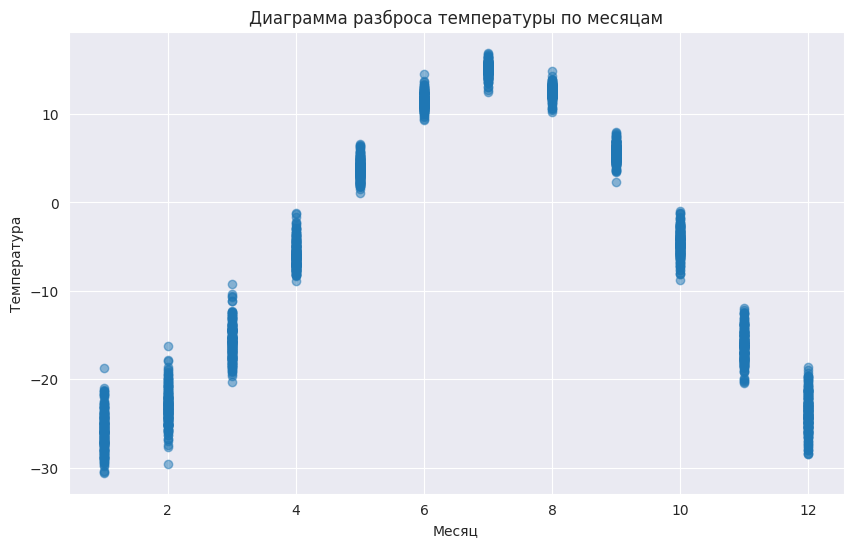

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df['month'], df['AverageTemperature'], alpha=0.5)
plt.title('Диаграмма разброса температуры по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Температура')
plt.show()

- **Ящик с усами (Box Plot):**


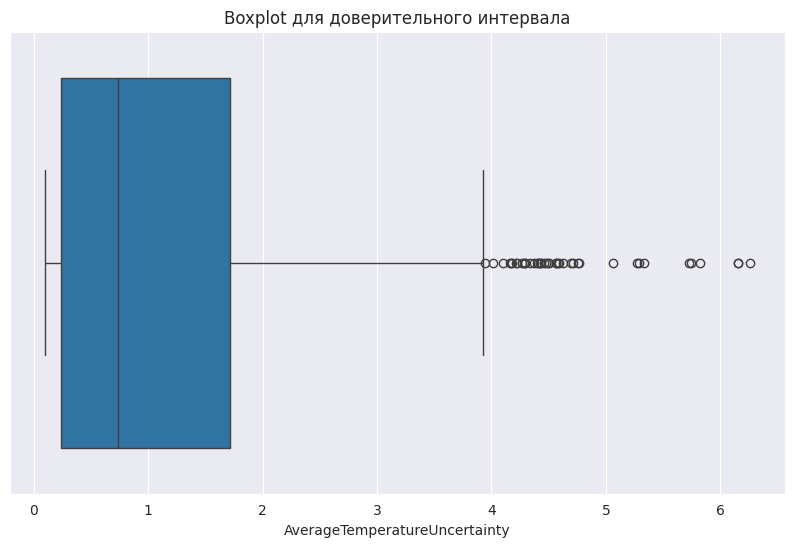

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['AverageTemperatureUncertainty'])
plt.title('Boxplot для доверительного интервала')
plt.show()


   - **Статистические методы (Z-оценка и IQR):**


   

In [18]:
# Вычисление Z-оценки
z_score = stats.zscore(df['AverageTemperature'])
outliers_z = [x for x in z_score if x > 3 or x < -3]
print("Outliers_z:")
print(outliers_z)
print()

# Вычисление межквартильного размаха (IQR)
Q1 = df['AverageTemperature'].quantile(0.25)
Q3 = df['AverageTemperature'].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = df[(df['AverageTemperature'] < (Q1 - 1.5 * IQR)) | (df['AverageTemperature'] > (Q3 + 1.5 * IQR))]
print(outliers_iqr)

Outliers_z:
[]

Empty DataFrame
Columns: [dt, AverageTemperature, AverageTemperatureUncertainty, month, year]
Index: []


Здесь:
   - Диаграмма разброса и ящик с усами позволяют визуально выявить выбросы.
   - Z-оценка и IQR помогают количественно определить выбросы.

2. **Обработка аномалий**

   В нашем случае обработка аномалий не требуется



**Оба визуальный и статистический анализы не выявили выбросов в данных**

### 3. Подготовка данных

Этап подготовки данных критичен для достижения качественных результатов при моделировании. Этот процесс включает преобразование данных, очистку, кодирование категориальных признаков, нормализацию и стандартизацию данных, а также инженерные преобразования и удаление ненужных элементов.

#### Преобразование и очистка данных

**1. Изменение типов данных**

Прежде всего, убедимся, что все данные имеют корректные типы. В нашем случае необходимо преобразовать строковые представления дат и времени в тип `datetime`, а также выполнить кодирование категориальных данных.




После этого следует очистка данных от ненужных символов и преобразование в числовой формат:

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2405 entries, 430275 to 432694
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             2405 non-null   datetime64[ns]
 1   AverageTemperature             2405 non-null   float64       
 2   AverageTemperatureUncertainty  2405 non-null   float64       
 3   month                          2405 non-null   int32         
 4   year                           2405 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2)
memory usage: 158.5 KB


In [20]:
df['month'] = df['month'].astype('category')
df['year'] = df['year'].astype('category')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2405 entries, 430275 to 432694
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             2405 non-null   datetime64[ns]
 1   AverageTemperature             2405 non-null   float64       
 2   AverageTemperatureUncertainty  2405 non-null   float64       
 3   month                          2405 non-null   category      
 4   year                           2405 non-null   category      
dtypes: category(2), datetime64[ns](1), float64(2)
memory usage: 153.9 KB


Таким образом, все столбцы будут приведены к соответствующим типам данных, что обеспечит корректность дальнейшего анализа и обработки данных.



- **Кодирование категориальных признаков:**

  Мы имеем несколько категориальных признаков, таких как `building_type`, `region`, и `object_type`. Эти признаки нужно преобразовать в числовые форматы. В Pandas можно использовать Label Encoding или One-Hot Encoding.

  - **Label Encoding** (для переменных с порядком):


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['month'] = le.fit_transform(df['month'])
df['year'] = le.fit_transform(df['year'])

In [23]:
old_df = df

**2. Нормализация и стандартизация данных**

Для улучшения работы модели, особенно для алгоритмов, чувствительных к масштабу данных, таких как регрессия или SVM, важно применить нормализацию или стандартизацию.

- **Нормализация данных:**

  Нормализация приводит данные к диапазону от 0 до 1. Это можно сделать с помощью Min-Max Scaling.


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['AverageTemperature', 'AverageTemperatureUncertainty']] = scaler.fit_transform(df[['AverageTemperature', 'AverageTemperatureUncertainty']])

In [25]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,month,year
430275,1812-01-01,0.072951,0.687947,0,0
430276,1812-02-01,0.103918,0.697368,1,0
430277,1812-03-01,0.241605,0.661144,2,0
430278,1812-04-01,0.483927,0.679825,3,0
430279,1812-05-01,0.692501,0.567414,4,0


  Здесь `MinMaxScaler` масштабирует данные в диапазон от 0 до 1, что делает данные совместимыми по шкале.

- **Стандартизация данных:**

  Стандартизация приводит данные к стандартному нормальному распределению (с нулевым средним и единичным стандартным отклонением).


### Инженерия признаков

Инженерия признаков — это процесс создания новых признаков из существующих данных для улучшения производительности модели. Ниже приведены примеры создания различных признаков, которые могут быть полезны в вашем анализе.

#### 1. Создание новых признаков



- **Сезон:**

Отнесение месяца к сезону:


In [26]:
old_df = df

In [27]:
def season_by_month(month):
# 2-4 - vesna, 5-7 - leto, 8-10 - osen, 11, 0, 1 - zima
     if 2 <= month <= 4:
         return 'Spring'
     elif 5 <= month <= 7:
         return 'Summer'
     elif 8 <= month <= 10:
         return 'Fall'
     else:
         return 'Winter'

df = df.assign(season = [season_by_month(x) for x in df['month']])

In [28]:
df.head(14)

,dt,AverageTemperature,AverageTemperatureUncertainty,month,year,season
430275,1812-01-01,0.072951,0.687947,0,0,Winter
430276,1812-02-01,0.103918,0.697368,1,0,Winter
430277,1812-03-01,0.241605,0.661144,2,0,Spring
430278,1812-04-01,0.483927,0.679825,3,0,Spring
430279,1812-05-01,0.692501,0.567414,4,0,Spring
430280,1812-06-01,0.859006,0.509747,5,0,Summer
430281,1812-07-01,0.966189,0.469623,6,0,Summer
430282,1812-08-01,0.956267,0.613548,7,0,Summer
430283,1812-09-01,0.726480,0.491878,8,0,Fall
430284,1812-10-01,0.507879,0.621995,9,0,Fall



#### Проверка типов данных после преобразования

После всех преобразований полезно проверить типы данных в датафрейме:


In [29]:
print("\nПроверка типов данных после преобразования:")
print(df.dtypes)


Проверка типов данных после преобразования:
dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
month                                     int64
year                                      int64
season                                   object
dtype: object


Новые переменные могут быть преобразованы в категориальный тип для повышения производительности и уменьшения использования памяти:

In [30]:
df['season'] = df['season'].astype('category')

In [31]:
one_hot_encoded_df = pd.get_dummies(df, columns=['season'])
one_hot_encoded_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,month,year,season_Fall,season_Spring,season_Summer,season_Winter
430275,1812-01-01,0.072951,0.687947,0,0,False,False,False,True
430276,1812-02-01,0.103918,0.697368,1,0,False,False,False,True
430277,1812-03-01,0.241605,0.661144,2,0,False,True,False,False
430278,1812-04-01,0.483927,0.679825,3,0,False,True,False,False
430279,1812-05-01,0.692501,0.567414,4,0,False,True,False,False


In [32]:
df = one_hot_encoded_df



**2. Преобразование существующих признаков**

Применение различных математических преобразований к данным может помочь улучшить качество модели.

- **Логарифмирование данных:**

  Логарифмирование помогает справиться с распределениями данных, которые сильно смещены.




 `np.log1p()` применяется для логарифмирования, что позволяет сохранить отрицательные значения при преобразовании.

- **Создание взаимодействующих признаков:**

  Примером может быть произведение двух признаков.




#### Удаление дубликатов и ненужных столбцов

**1. Удаление дубликатов**


Дубликаты могут искажать результаты анализа и моделирования, поэтому важно их удалить или обработать.

Прежде всего, проверим, существуют ли в нашем датасете дубликаты. Если они есть, их необходимо удалить. Для этого можно использовать функции, которые позволяют находить и удалять повторяющиеся записи. Например, в Python с использованием библиотеки pandas это можно сделать следующим образом:



In [33]:
# Проверка на наличие дубликатов
duplicates = df.duplicated().sum()
print(f'Количество дубликатов: {duplicates}')

# Удаление дубликатов
df.drop_duplicates(inplace=True)
#df_cleaned=df.drop_duplicates()
print('Дубликаты удалены.')

Количество дубликатов: 0
Дубликаты удалены.


После удаления дубликатов важно провести несколько проверок, чтобы убедиться, что данные теперь корректны для дальнейшего анализа. Вот некоторые шаги, которые можно предпринять:

1. **Проверка количества записей**: Сравните количество записей до и после удаления дубликатов. Это поможет понять, насколько сильно данные были очищены.

   ```python
   print(f'Количество записей до удаления дубликатов: {len(df)}')
   print(f'Количество записей после удаления дубликатов: {len(df_cleaned)}')
   ```

2. **Анализ уникальных значений**: Проверьте уникальные значения в ключевых столбцах, чтобы убедиться, что они соответствуют ожиданиям.

   ```python
   print(df_cleaned['ваш_столбец'].unique())
   ```

3. **Проверка на пропущенные значения**: Убедитесь, что удаление дубликатов не привело к появлению новых пропусков в данных.

   ```python
   print(df_cleaned.isnull().sum())
   ```

4. **Сравнение статистики**: Проверьте основные статистические показатели (среднее, медиана, стандартное отклонение) до и после удаления дубликатов, чтобы увидеть, как они изменились.

   ```python
   print(df.describe())
   print(df_cleaned.describe())
   ```

5. **Визуализация данных**: Используйте графики для визуализации данных до и после удаления дубликатов, чтобы увидеть, как изменилось распределение.

6. **Дополнительная обработка**: Если вы обнаружите, что дубликаты содержат полезную информацию (например, разные записи для одного и того же объекта), возможно, вам потребуется объединить их или обработать иначе, вместо простого удаления.

Эти шаги помогут убедиться, что данные теперь готовы к дальнейшему анализу и не содержат скрытых проблем.


**2. Удаление ненужных столбцов**

Удаление столбцов, которые не предоставляют полезной информации для модели, помогает упростить данные и ускорить процесс обучения.






Таким образом, подготовка данных является важным этапом в процессе создания модели машинного обучения. Этот этап включает в себя преобразование данных, их очистку, кодирование категориальных признаков, нормализацию и стандартизацию числовых данных, создание и преобразование признаков, а также удаление дубликатов и ненужных столбцов. Хорошо подготовленные данные обеспечивают более точные и надежные результаты моделей и анализа.

In [34]:
old_df = df.copy()

In [35]:
df = old_df.copy()

In [36]:
df = df[df["year"] >= 28]

### 4. Исследовательский анализ данных (EDA)

Исследовательский анализ данных (EDA) представляет собой ключевой этап в процессе подготовки данных, направленный на получение глубокого понимания набора данных. Этот этап позволяет выявить основные тенденции, аномалии, взаимосвязи между признаками, а также проверить распределения данных. Подробно рассмотрим каждую часть процесса EDA.

#### Анализ тенденций и аномалий

**1. Определение тенденций**

Для анализа тенденций в данных, особенно временных рядов, мы можем использовать различные методы визуализации и статистические подходы.

- **Исследование временных рядов:**

  Мы будем анализировать, как изменяется температура в стране с течением времени. Построим график, чтобы увидеть тренды.


<ipython-input-37-ef656961ea7d>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_temp = df['AverageTemperature'].resample('M').mean()
<ipython-input-37-ef656961ea7d>:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_temp = monthly_temp.fillna(method='ffill')  # Заполнение вперед


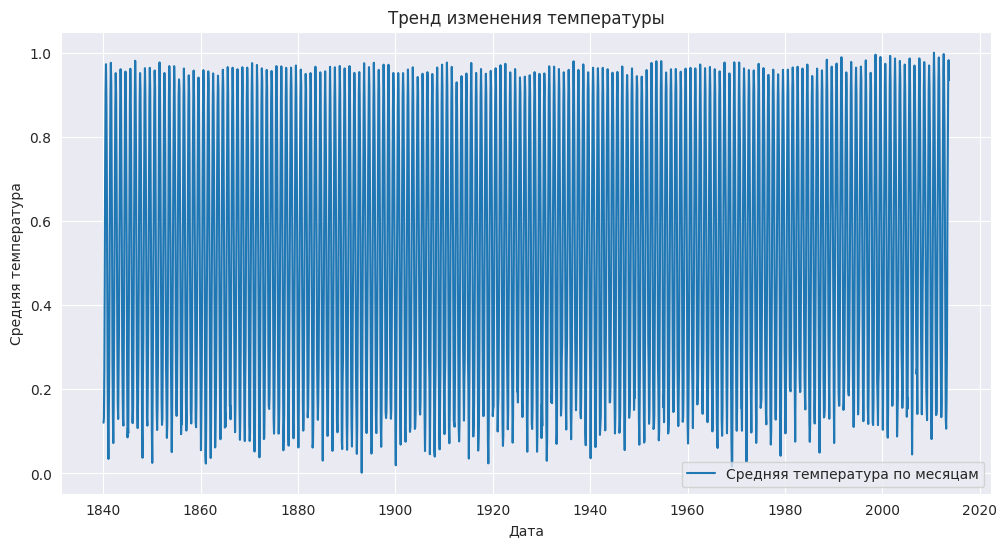

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем 'datetime' в индекс
df.set_index('dt', inplace=True)

# Группируем данные по месяцам и вычисляем среднюю цену
monthly_temp = df['AverageTemperature'].resample('M').mean()

#Заполнение пропусков:
monthly_temp = monthly_temp.fillna(method='ffill')  # Заполнение вперед

# Построение графика временного ряда
plt.figure(figsize=(12, 6))
plt.plot(monthly_temp, label='Средняя температура по месяцам')
plt.title('Тренд изменения температуры')
plt.xlabel('Дата')
plt.ylabel('Средняя температура')
plt.legend()
plt.grid(True)
plt.show()


  Этот график позволит нам увидеть, есть ли явные тренды в изменении цен на недвижимость.

- **Моделирование трендов:**

  Для более точного анализа трендов можно использовать линейную регрессию или скользящие средние.



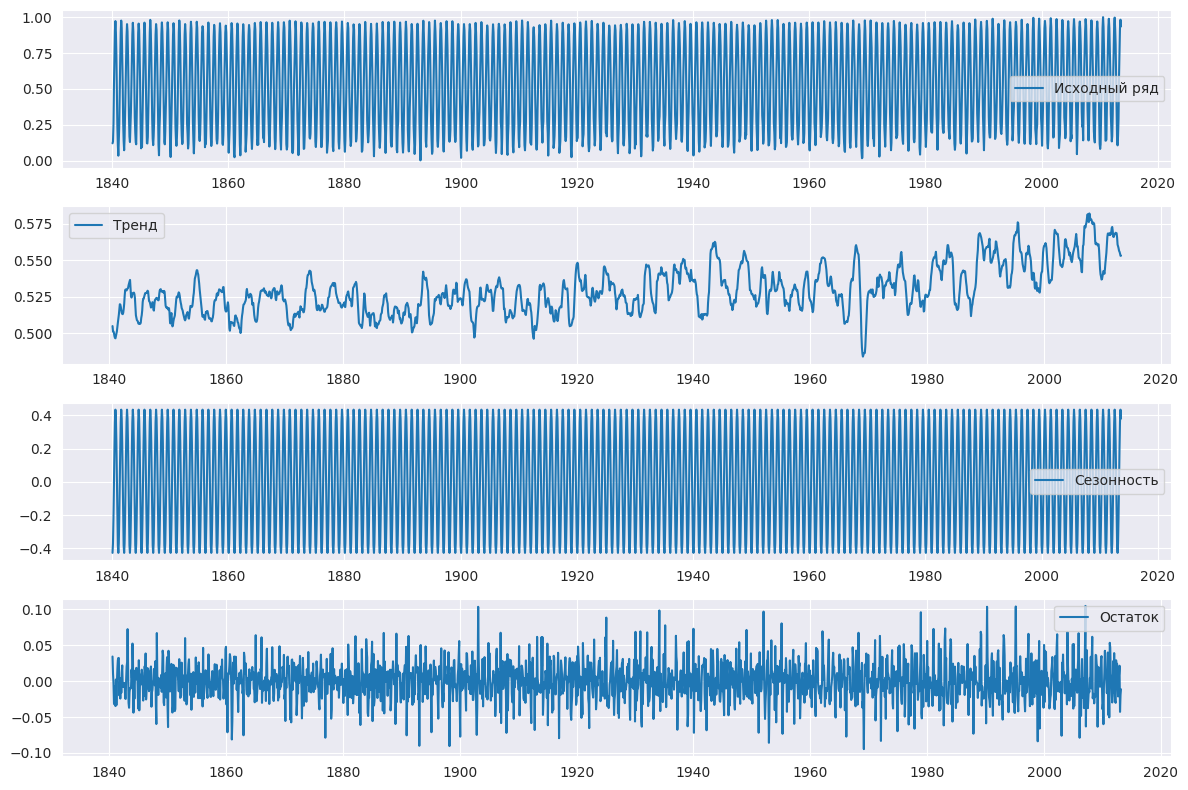

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Декомпозиция временного ряда
decomposition = seasonal_decompose(monthly_temp, model='additive')

# Построение графиков компонентов
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(monthly_temp, label='Исходный ряд')
plt.legend()
plt.subplot(412)
plt.plot(decomposition.trend, label='Тренд')
plt.legend()
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Сезонность')
plt.legend()
plt.subplot(414)
plt.plot(decomposition.resid, label='Остаток')
plt.legend()
plt.tight_layout()
plt.show()


  Этот подход позволяет выделить тренды, сезонные колебания и остатки.

**2. Анализ аномалий**

Аномалии в данных могут указывать на ошибочные записи или важные события.

- **Визуализация аномалий:**

  Построим диаграмму разброса (scatter plot) и ящик с усами (box plot) для выявления аномалий в температуре и других числовых признаках.


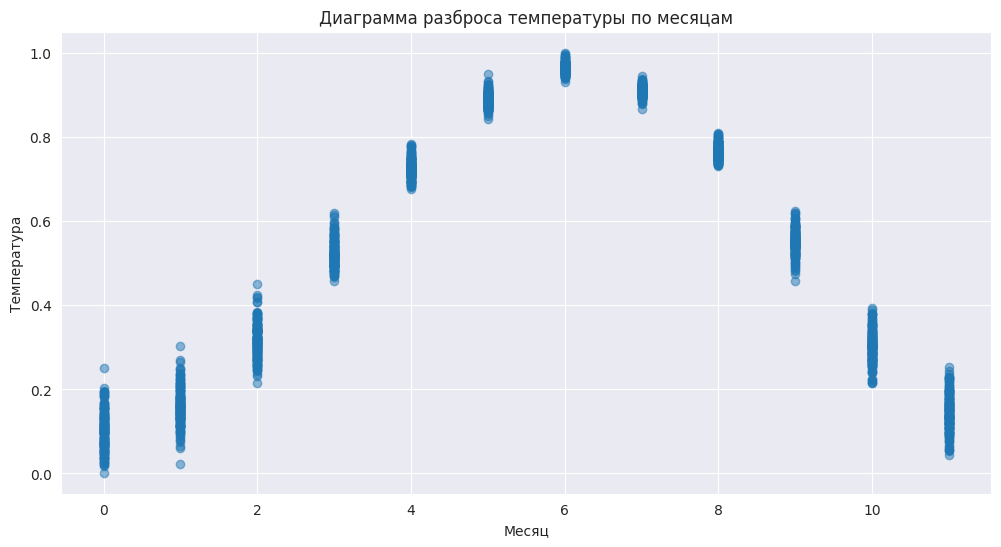

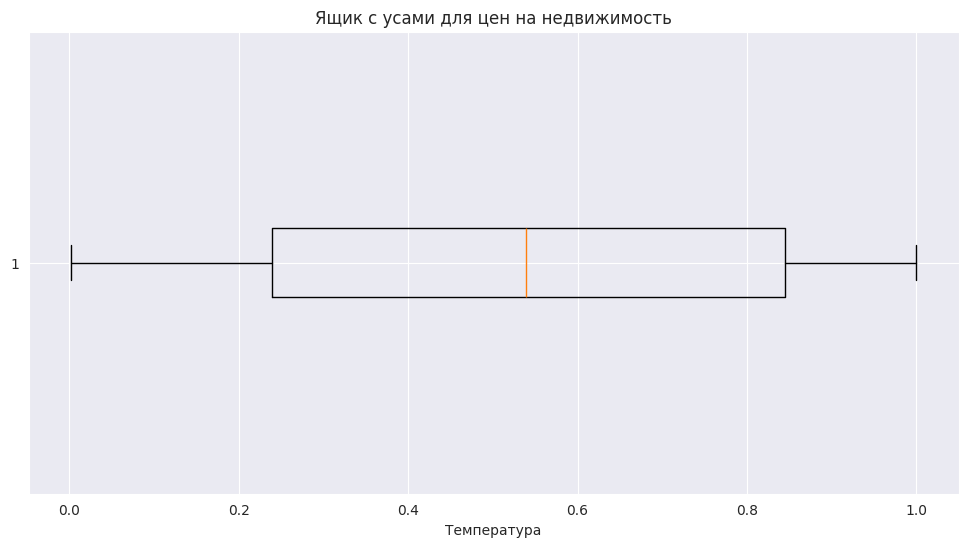

In [39]:
# Диаграмма разброса для выявления аномалий
plt.figure(figsize=(12, 6))
plt.scatter(df['month'], df['AverageTemperature'], alpha=0.5)
plt.title('Диаграмма разброса температуры по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Температура')
plt.grid(True)
plt.show()

# Ящик с усами для анализа распределения цен
plt.figure(figsize=(12, 6))
plt.boxplot(df['AverageTemperature'], vert=False)
plt.title('Ящик с усами для цен на недвижимость')
plt.xlabel('Температура')
plt.grid(True)
plt.show()


  Эти графики помогут обнаружить выбросы и аномальные значения в данных.

#### Визуализация данных

**1. Построение графиков и диаграмм**

- **Гистограммы:**

  Гистограммы полезны для проверки распределения данных.


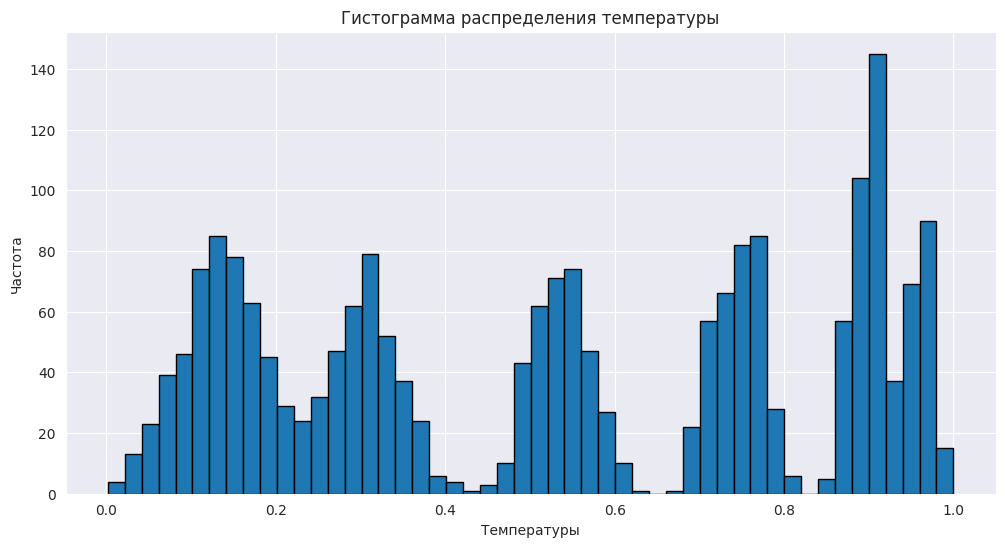

In [40]:
# Гистограмма для анализа распределения температуры
plt.figure(figsize=(12, 6))
plt.hist(df['AverageTemperature'], bins=50, edgecolor='k')
plt.title('Гистограмма распределения температуры')
plt.xlabel('Температуры')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

### 5. Проверка гипотез

На этапе проверки гипотез мы проводим статистический анализ данных, чтобы подтвердить или опровергнуть предположения о взаимосвязях между переменными. Этот этап критически важен для определения значимости признаков и оценки возможного влияния одной переменной на другую. Рассмотрим более подробно, как можно реализовать проверку гипотез в Python.

#### 1. Корреляционный анализ

Корреляционный анализ позволяет определить степень взаимосвязи между переменными.

**1.1. Вычисление коэффициентов корреляции**

Коэффициенты корреляции помогают понять, насколько сильно связаны две переменные. Наиболее распространенные коэффициенты корреляции — это коэффициент Пирсона и Спирмена.

- **Коэффициент корреляции Пирсона**: Используется для определения линейной зависимости между переменными. Подходит для количественных данных.

- **Коэффициент корреляции Спирмена**: Используется для проверки монотонных зависимостей. Подходит для данных с ранговыми шкалами или когда данные не распределены нормально.



In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2084 entries, 1840-01-01 to 2013-08-01
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AverageTemperature             2084 non-null   float64
 1   AverageTemperatureUncertainty  2084 non-null   float64
 2   month                          2084 non-null   int64  
 3   year                           2084 non-null   int64  
 4   season_Fall                    2084 non-null   bool   
 5   season_Spring                  2084 non-null   bool   
 6   season_Summer                  2084 non-null   bool   
 7   season_Winter                  2084 non-null   bool   
dtypes: bool(4), float64(2), int64(2)
memory usage: 89.5 KB


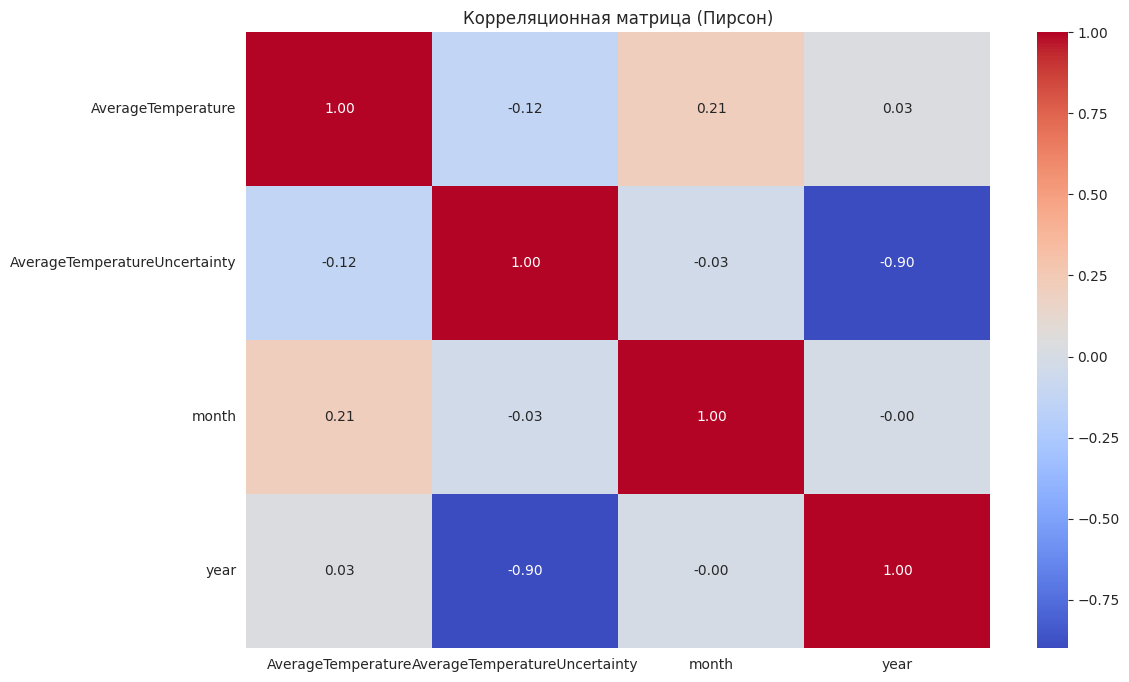

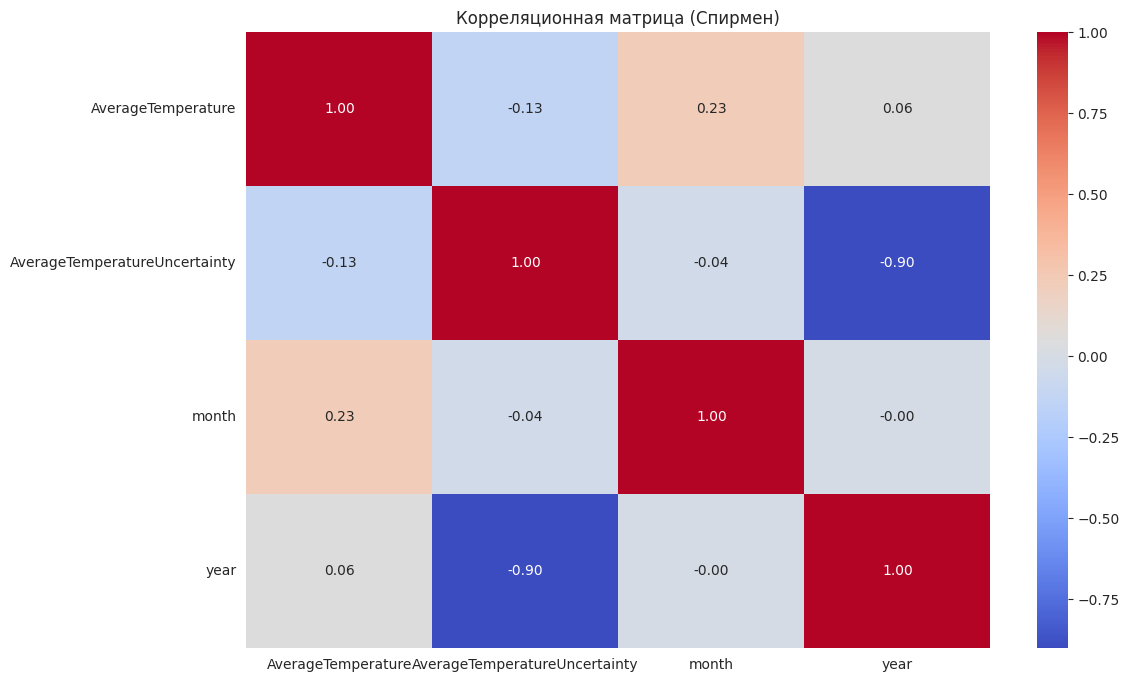

In [42]:
# Оставляем только числовые столбцы
numeric_df = df.select_dtypes(include=['float64', 'int64', 'int32'])

# Рассчитываем коэффициенты корреляции
pearson_corr = numeric_df.corr(method='pearson')
spearman_corr = numeric_df.corr(method='spearman')

# Визуализация
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица (Пирсон)')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица (Спирмен)')
plt.show()

In [43]:
pearson_corr

,AverageTemperature,AverageTemperatureUncertainty,month,year
AverageTemperature,1.000000,-0.124772,0.208887,0.034981
AverageTemperatureUncertainty,-0.124772,1.000000,-0.033517,-0.899804
month,0.208887,-0.033517,1.000000,-0.003846
year,0.034981,-0.899804,-0.003846,1.000000


In [44]:
spearman_corr

,AverageTemperature,AverageTemperatureUncertainty,month,year
AverageTemperature,1.000000,-0.133464,0.228959,0.055782
AverageTemperatureUncertainty,-0.133464,1.000000,-0.039419,-0.901290
month,0.228959,-0.039419,1.000000,-0.003837
year,0.055782,-0.901290,-0.003837,1.000000



### Основные выводы

Единственная значимая корреляция наблюдается между AverageTemperatureUncertainty и годом (r = -0.9012), что указывает на сильную обратную связь. Из этого мы можем сделать вывод о том, что чем новее данные, тем они полнее и достовернее.

Так как в нашем датасете отсутствуют коррелирующие с целевой переменной фичи, для того, чтобы сформулировать и проверить гипотезы, добавим несколько фиктивных фичей:

In [45]:
old_df = df.copy()

In [46]:
df = old_df

In [47]:
import random

df = df.assign(shifted_temp = [x + 11 for x in df["AverageTemperature"]])
df = df.assign(temp_rand = [x + random.random() for x in df["AverageTemperature"]])

def season_by_month(month):
# 2-4 - vesna, 5-7 - leto, 8-10 - osen, 11, 0, 1 - zima
     if 2 <= month <= 4:
         return 'Spring'
     elif 5 <= month <= 7:
         return 'Summer'
     elif 8 <= month <= 10:
         return 'Fall'
     else:
         return 'Winter'

df = df.assign(season = [season_by_month(x) for x in df['month']])

df.head()

,AverageTemperature,AverageTemperatureUncertainty,month,year,season_Fall,season_Spring,season_Summer,season_Winter,shifted_temp,temp_rand,season
dt,,,,,,,,,,,
1840-01-01,0.120624,0.373619,0,28,False,False,False,True,11.120624,0.551936,Winter
1840-02-01,0.131957,0.369883,1,28,False,False,False,True,11.131957,0.160139,Winter
1840-03-01,0.251338,0.320500,2,28,False,True,False,False,11.251338,0.603614,Spring
1840-04-01,0.523046,0.273392,3,28,False,True,False,False,11.523046,1.476296,Spring
1840-05-01,0.734401,0.238954,4,28,False,True,False,False,11.734401,0.886513,Spring


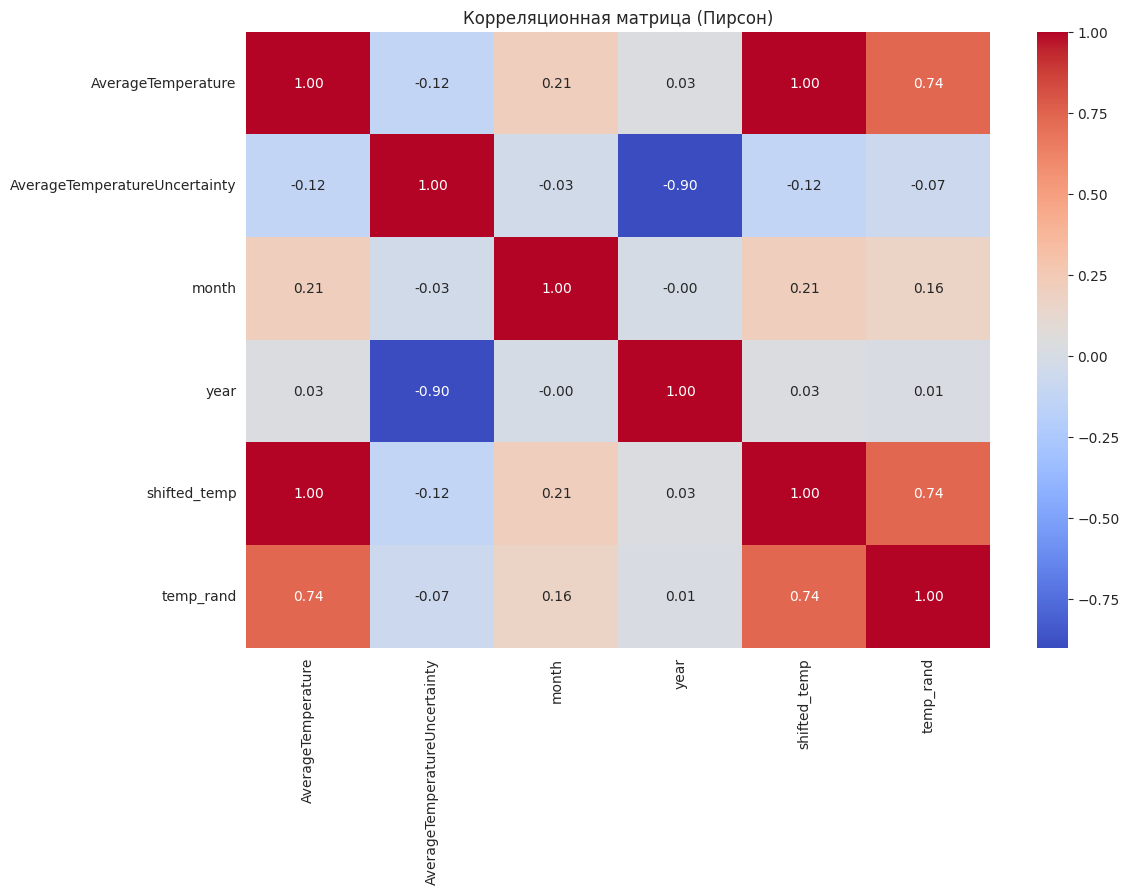

In [48]:
numeric_df = df.select_dtypes(include=['float64', 'int64', 'int32'])
pearson_corr = numeric_df.corr(method='pearson')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица (Пирсон)')
plt.show()


### 2. Проверка гипотез о значимости переменных

Ниже приведены гипотезы, которые направлены на выявление зависимостей между температурой в стране и различными переменными. Эти гипотезы помогут определить ключевые факторы, которые будут включены в модель для предсказания температуры.

Каждая гипотеза включает нулевую гипотезу ($H_0$) — предположение, что определенная характеристика не влияет на среднюю температуру, и альтернативную гипотезу ($H_1$) — предположение, что характеристика оказывает влияние на среднюю температуру. Проверка данных гипотез позволит определить, какие из переменных стоит учитывать при создании модели.


- **Гипотеза 1: Влияние месяца на среднюю температуру**
  - **$H_0$**: Месяц не влияет на среднюю температуру.
  - **$H_1$**: Месяц влияет на среднюю температуру.

- **Гипотеза 2: Влияние года и месяца на среднюю температуру**
  - **$H_0$**: Год и месяц не влияет на среднюю температуру.
  - **$H_1$**: Год и месяц влияет на среднюю температуру.

- **Гипотеза 3: Зашумлённая температура связана со средней температурой**
  - **$H_0$**: Зашумлённая температура не связана со средней температурой.
  - **$H_1$**: Зашумлённая температура значительно связана со средней температурой.

- **Гипотеза 4: Сдвинутая температура связана со средней температурой**
  - **$H_0$**: Сдвинутая температура не связана со средней температурой.
  - **$H_1$**: Сдвинутая температура значительно связана со средней температурой.

- **Гипотеза 5: Влияние сезона на среднюю температуру**
  - **$H_0$**: Сезон не влияет на среднюю температуру.
  - **$H_1$**: Сезон влияет на среднюю температуру.


Для реализации всех перечисленных гипотез с помощью различных статистических тестов на Python мы будем использовать библиотеки pandas, scipy, statsmodels, а также, возможно, другие необходимые библиотеки для обработки данных и проведения статистических тестов.

Для проверок, связанных с непрерывными переменными (например, зашумлённая температура), мы будем использовать:

- Корреляционный анализ (тест Пирсона или Спирмена).
- Регрессионный анализ (например, линейная регрессия).

Для категориальных переменных мы можем использовать:

- t-тест (для двух категорий).
- ANOVA (для нескольких категорий).
- χ²-тест (для категориальных переменных).

Для временных данных (сезон, время суток) мы можем использовать:

- ANOVA для сравнений средних между категориями.

Вот пример кода, реализующий все гипотезы:

In [49]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Гипотеза 1: Влияние месяца на среднюю температуру (ANOVA)
model = ols('AverageTemperature ~ C(month)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(f'Гипотеза 1: Влияние месяца на среднюю температуру:\n{anova_table}')

# Гипотеза 2: Влияние года и месяца на среднюю температуру (ANOVA по годам и месяцам)
model = ols('AverageTemperature ~ C(year) + C(month)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(f'\nГипотеза 2: Влияние года и месяца на среднюю температуру:\n{anova_table}')

# Гипотеза 3: Влияние зашумлённой температуры на среднюю температуру
stat, p_value = stats.pearsonr(df['temp_rand'], df['AverageTemperature'])
print(f'\nГипотеза 3: Зашумлённая температура связана со средней температурой: p-value = {p_value}')

# Гипотеза 4: Влияние сдвинутой температуры на среднюю температуру
stat, p_value = stats.pearsonr(df['shifted_temp'], df['AverageTemperature'])
print(f'\nГипотеза 4: Сдвинутая температура связана со средней температурой: p-value = {p_value}')

# Гипотеза 5: Влияние сезона на среднюю температуру (ANOVA)
model = ols('AverageTemperature ~ C(season)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(f'\nГипотеза 5: Влияние сезона на среднюю температуру:\n{anova_table}')


Гипотеза 1: Влияние месяца на среднюю температуру:
              sum_sq      df             F  PR(>F)
C(month)  194.342163    11.0  17373.478138     0.0
Residual    2.107062  2072.0           NaN     NaN

Гипотеза 2: Влияние года и месяца на среднюю температуру:
              sum_sq      df             F        PR(>F)
C(year)     0.561309   173.0      3.986029  1.159490e-50
C(month)  194.310755    11.0  21701.458793  0.000000e+00
Residual    1.545753  1899.0           NaN           NaN

Гипотеза 3: Зашумлённая температура связана со средней температурой: p-value = 0.0

Гипотеза 4: Сдвинутая температура связана со средней температурой: p-value = 0.0

Гипотеза 5: Влияние сезона на среднюю температуру:
               sum_sq      df            F  PR(>F)
C(season)  160.460716     3.0  3091.341329     0.0
Residual    35.988508  2080.0          NaN     NaN



### Анализ Результатов

Из полученных результатов видно, что месяц и сезон влияют на среднюю температуру сильно, в то время, как год влияния не оказывает. Кроме того, наши специфические данные, изначально зависимые от средней температуры, ожидаемо, показали нулевой p-value, что свидетельствует о значительной зависимости.



На основе представленных данных о корреляциях и результатах гипотез можно определить, какие факторы оказывают значительное влияние на цену квартиры. Проанализируем шаги для отбора признаков.

### **Анализ корреляций**
   На основе корреляционных матриц (Пирсона и Спирмена), можно выделить несколько признаков, которые показывают сильную корреляцию с ценой квартиры. Признаки с высокой корреляцией следует учитывать, а признаки с низкой или незначительной корреляцией можно исключить или использовать для дальнейшего анализа на предмет мультиколлинеарности.



In [50]:
print(df.keys())

Index(['AverageTemperature', 'AverageTemperatureUncertainty', 'month', 'year',
       'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter',
       'shifted_temp', 'temp_rand', 'season'],
      dtype='object')


In [72]:
# Определяем массив признаков для анализа влияния на цену квартиры
features = [
    'AverageTemperature',
    'month',
    'year',
    'season_Fall',
    'season_Spring',
    'season_Summer',
    'season_Winter',
    'temp_rand',
    'shifted_temp',
]

Этот список содержит ключевые признаки, которые необходимо использовать для построения модели прогнозирования цены квартиры.

In [73]:
sample_size=10000
data=df[features].head(sample_size)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2084 entries, 1840-01-01 to 2013-08-01
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AverageTemperature  2084 non-null   float64
 1   month               2084 non-null   int64  
 2   year                2084 non-null   int64  
 3   season_Fall         2084 non-null   bool   
 4   season_Spring       2084 non-null   bool   
 5   season_Summer       2084 non-null   bool   
 6   season_Winter       2084 non-null   bool   
 7   temp_rand           2084 non-null   float64
 8   shifted_temp        2084 non-null   float64
dtypes: bool(4), float64(3), int64(2)
memory usage: 105.8 KB


На следующем шаге мы добавим лаговые признаки для временного ряда. Лаговые признаки позволяют учитывать значения предыдущих периодов, что может значительно улучшить качество прогнозирования.

In [74]:
# **Создание лаговых признаков**
data['temp_lag_1'] = data['AverageTemperature'].shift(1)  # Лаг на 1 шаг
data['temp_lag_2'] = data['AverageTemperature'].shift(2)  # Лаг на 2 шага

# Можно добавить дополнительные лаги, если это необходимо
data['temp_lag_3'] = data['AverageTemperature'].shift(3)  # Лаг на 3 шага


# Проверка результата
data.head()

,AverageTemperature,month,year,season_Fall,season_Spring,season_Summer,season_Winter,temp_rand,shifted_temp,temp_lag_1,temp_lag_2,temp_lag_3
dt,,,,,,,,,,,,
1840-01-01,0.120624,0,28,False,False,False,True,0.551936,11.120624,NaN,NaN,NaN
1840-02-01,0.131957,1,28,False,False,False,True,0.160139,11.131957,0.120624,NaN,NaN
1840-03-01,0.251338,2,28,False,True,False,False,0.603614,11.251338,0.131957,0.120624,NaN
1840-04-01,0.523046,3,28,False,True,False,False,1.476296,11.523046,0.251338,0.131957,0.120624
1840-05-01,0.734401,4,28,False,True,False,False,0.886513,11.734401,0.523046,0.251338,0.131957


In [75]:
categorical_features = ['year', 'month', 'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter']
target = 'AverageTemperature'

# Выбираем признаки для масштабирования (исключаем категориальные, целевую переменную и year_built)
features_to_scale = [feature for feature in features if feature not in categorical_features and feature != target and feature != 'year_built']

# Добавляем лаговые признаки к списку для масштабирования
#features_to_scale = data.columns.tolist()  # Получаем список всех имен колонок
print(features_to_scale)

['temp_rand', 'shifted_temp']


 Мы создадим новые переменные, которые будут представлять собой значения временного ряда на предыдущих временных отметках. Это поможет модели лучше захватывать временные зависимости и тренды в данных.

### Шаг 2: Удаление NaN значений

После создания лаговых переменных скорее всего возникли `NaN` значения. Для этого мы проверим и удалим такие строки.

#### Код для удаления NaN:

In [76]:
# Сохраняем исходное количество строк
original_shape = data.shape[0]

# Удаление строк с NaN значениями
data.dropna(inplace=True)

# Получаем новое количество строк
new_shape = data.shape[0]

# Рассчитываем процент удалённых строк
removed_percentage = ((original_shape - new_shape) / original_shape) * 100

print(f"Удалено {removed_percentage:.2f}% строк.")

Удалено 0.14% строк.


### Шаг 3: Проверка мультиколлинеарности через VIF и удаление

Мультиколлинеарность возникает, когда один признак может быть линейно предсказан на основе других признаков. Для проверки мультиколлинеарности используется фактор инфляции дисперсии (VIF). Высокие значения VIF (обычно больше 10) могут указывать на сильную мультиколлинеарность.

#### Код для расчета VIF:

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Рассчитываем VIF для всех признаков
X = data[features_to_scale]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Выводим VIF для каждого признака
print("VIF для каждого признака:")
print(vif_data)

# Удаляем признаки с VIF > 10
high_vif_features = vif_data[vif_data["VIF"] > 10]["feature"].tolist()
data.drop(columns=high_vif_features, inplace=True)

# Выводим информацию о удалённых и оставшихся признаках
print(f"Удалённые признаки с VIF > 10: {high_vif_features}")
remaining_features = data.columns.tolist()
print(f"Оставшиеся признаки: {remaining_features}")

VIF для каждого признака:
        feature       VIF
0     temp_rand  7.565994
1  shifted_temp  7.565994
Удалённые признаки с VIF > 10: []
Оставшиеся признаки: ['AverageTemperature', 'month', 'year', 'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter', 'temp_rand', 'shifted_temp', 'temp_lag_1', 'temp_lag_2', 'temp_lag_3']



### Шаг 4: Проверка на стационарность и преобразование

Стационарность данных — это условие, при котором среднее и дисперсия остаются постоянными с течением времени. Для проверки стационарности можно использовать тест Дики-Фуллера. Если данные не стационарны, можно использовать разностное преобразование (дифференцирование).

#### Код для проверки на стационарность:

In [78]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Функция для проверки на стационарность
def check_stationarity(series):
    result = adfuller(series)
    p_value = result[1]
    return p_value

# Преобразование в стационарный вид
for feature in features_to_scale:
    p_value = check_stationarity(data[feature])
    if p_value > 0.05:  # Если p-value > 0.05, данные не стационарны
        data[feature] = data[feature].diff().dropna()  # Дифференцируем данные
        print(f"{feature} был преобразован в стационарный вид.")
    else:
        print(f"{feature} уже стационарен.")

temp_rand уже стационарен.
shifted_temp уже стационарен.



### Шаг 5: Выбор окончательных признаков

После проверки на мультиколлинеарность и стационарность, выбираем оставшиеся признаки, которые будут использованы для модели.

#### Код для выбора окончательных признаков:

In [87]:
# Удаление константных колонок
data = data.loc[:, (data != data.iloc[0]).any()]
# Окончательные признаки после проверки на мультиколлинеарность и стационарность
final_features = data.columns.tolist()
if 'temp_rand' in final_features:
  final_features.remove("temp_rand")
if 'shifted_temp' in final_features:
  final_features.remove("shifted_temp")
final_features

['AverageTemperature',
 'month',
 'year',
 'season_Fall',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'temp_lag_1',
 'temp_lag_2',
 'temp_lag_3']


### Шаг 6: Разделение данных на тренировочные и тестовые выборки

Для обучения модели необходимо разделить данные на тренировочную, валидационную и тестовую выборки. Обычно используется пропорция 70-80% данных для тренировки, 10-15% для валидации и 10-15% для тестирования. Для выполнения данного разделения мы проведем следующие шаги:

1. **Исключение целевой переменной и разделение данных:**  
   На этом этапе мы исключаем целевую переменную (`AverageTemperature`) из списка признаков для модели. Это необходимо для предотвращения утечки данных при построении модели. Далее производится разделение данных на признаки (X) и целевую переменную (y), что позволит использовать эти наборы для обучения и тестирования модели. Для разделения данных применяется метод **train_test_split**, который обеспечивает случайное разбиение данных на тренировочные и временные выборки.

2. **Дополнительное разбиение на валидационные и тестовые выборки:**  
   После первичного разделения данных на тренировочные и временные наборы выполняется дополнительное разбиение временной выборки на тестовую и валидационную выборки. Это обеспечивает наличие независимого тестового набора для окончательной проверки качества модели, а также валидационной выборки для оптимизации параметров модели.

3. **Проверка размерностей данных:**  
   После разбиения данных необходимо проверить их размерности, чтобы убедиться в корректности распределения наблюдений по тренировочной, валидационной и тестовой выборкам.

Для обработки выбросов в данных перед разделением на признаки (X) и целевую переменную (y) можно воспользоваться различными методами. Вот несколько возможных подходов:

### 1. Использование межквартильного размаха (Interquartile Range, IQR)

Метод IQR позволяет определить выбросы на основе распределения данных в признаке:

```python
import numpy as np

def remove_outliers_iqr(data, features):
    Q1 = data[features].quantile(0.25)
    Q3 = data[features].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_no_outliers = data[(data[features] >= lower_bound) & (data[features] <= upper_bound)]
    return data_no_outliers

# Применение функции к данным
data_clean = remove_outliers_iqr(data, final_features)
```

### 2. Использование стандартного отклонения

Для нормально распределенных данных можно удалить значения, находящиеся за пределами нескольких стандартных отклонений от среднего.

```python
def remove_outliers_std(data, features, threshold=3):
    mean = data[features].mean()
    std_dev = data[features].std()
    lower_bound = mean - threshold * std_dev
    upper_bound = mean + threshold * std_dev
    data_no_outliers = data[(data[features] >= lower_bound) & (data[features] <= upper_bound)]
    return data_no_outliers

# Применение функции к данным
data_clean = remove_outliers_std(data, final_features)
```

### 3. Использование методов машинного обучения

Некоторые модели машинного обучения, такие как Isolation Forest или One-Class SVM, могут использоваться для выявления и удаления выбросов.

```python
from sklearn.ensemble import IsolationForest

def remove_outliers_iforest(data, features):
    clf = IsolationForest(contamination=0.05, random_state=42)
    clf.fit(data[features])
    outliers = clf.predict(data[features]) == -1
    data_no_outliers = data[~outliers]
    return data_no_outliers

# Применение функции к данным
data_clean = remove_outliers_iforest(data, final_features)
```

### Применение к исходному коду

Если применить один из этих методов к вашему исходному коду, он будет выглядеть примерно так:

```python
from sklearn.model_selection import train_test_split

# Удаление выбросов из данных
data_clean = remove_outliers_iqr(data, final_features)

# Разделяем данные на признаки (X) и целевую переменную (y)
X = data_clean[final_features]
y = data_clean[target]
```

Выбор метода обработки выбросов зависит от распределения данных и специфики задачи.

In [84]:
# import numpy as np

# def remove_outliers_iqr(data, features):
#     Q1 = data[features].quantile(0.25)
#     Q3 = data[features].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     data_no_outliers = data[(data[features] >= lower_bound) & (data[features] <= upper_bound)]
#     return data_no_outliers

# # Применение функции к данным
# data_clean = remove_outliers_iqr(data, final_features)
# data_clean = data_clean.dropna()  # Удаляем строки с NaN, если они появились
if 'shifted_temp' in data.keys():
  del data['shifted_temp']
if 'temp_rand' in data.keys():
  del data['temp_rand']
data_clean = data
data_clean.head()

,AverageTemperature,month,year,season_Fall,season_Spring,season_Summer,season_Winter,temp_lag_1,temp_lag_2,temp_lag_3
dt,,,,,,,,,,
1840-04-01,0.523046,3,28,False,True,False,False,0.251338,0.131957,0.120624
1840-05-01,0.734401,4,28,False,True,False,False,0.523046,0.251338,0.131957
1840-06-01,0.904550,5,28,False,False,True,False,0.734401,0.523046,0.251338
1840-07-01,0.972699,6,28,False,False,True,False,0.904550,0.734401,0.523046
1840-08-01,0.891721,7,28,False,False,True,False,0.972699,0.904550,0.734401


In [88]:
from sklearn.model_selection import train_test_split

target = "AverageTemperature"

# Исключаем целевую переменную 'price' из признаков
final_features = [feature for feature in final_features if feature != target]

# Разделяем данные на признаки (X) и целевую переменную (y)
X = data_clean[final_features]

y = data_clean[target]

# Сначала разделяем данные на тренировочные и временные выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Затем разделяем временные выборки на тестовые и валидационные
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Проверка размерностей
print(f"Размеры тренировочного набора: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Размеры валидационного набора: X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"Размеры тестового набора: X_test: {X_test.shape}, y_test: {y_test.shape}")


Размеры тренировочного набора: X_train: (1664, 9), y_train: (1664,)
Размеры валидационного набора: X_val: (208, 9), y_val: (208,)
Размеры тестового набора: X_test: (209, 9), y_test: (209,)


In [89]:
# Окончательные признаки после проверки на мультиколлинеарность и стационарность
final_features = X.columns.tolist()
final_features+=['AverageTemperature']
final_features

['month',
 'year',
 'season_Fall',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'temp_lag_1',
 'temp_lag_2',
 'temp_lag_3',
 'AverageTemperature']

## Модель VAR

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro


# Шаг 1: Кросс-валидация с подбором гиперпараметров (количество лагов)
tscv = TimeSeriesSplit(n_splits=5)
best_lag_order = None
best_rmse = float('inf')  # Для поиска наилучшего значения RMSE

for train_index, val_index in tscv.split(X_train):
    # Формируем обучающие и валидационные выборки для текущего фолда
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    train_fold_data = pd.concat([X_train_fold, y_train_fold], axis=1)
    # Проверка и заполнение пропущенных значений
    train_fold_data = train_fold_data.fillna(method='ffill')  # Заполнение вперед

    # Подбор гиперпараметров: пробуем разное количество лагов
    for lags in range(1, 6):  # Проверяем количество лагов от 1 до 5
        model_fold = VAR(train_fold_data).fit(lags)

        # Прогноз на валидационной выборке для текущего фолда
        predictions = model_fold.forecast(train_fold_data.values[-lags:], steps=len(y_val_fold))

        # Оценка на валидационных данных текущего фолда
        val_rmse = np.sqrt(mean_squared_error(y_val_fold, predictions[:, -1]))

        # Сравниваем текущий результат с лучшим
        if val_rmse < best_rmse:
            best_rmse = val_rmse
            best_lag_order = lags  # Сохраняем лучшее количество лагов

    print(f"Fold результаты: RMSE = {val_rmse} для {lags} лагов")

# Вывод наилучшего числа лагов после кросс-валидации
print(f"Наилучшее количество лагов: {best_lag_order}, с RMSE: {best_rmse}")

# Шаг 2: Обучение модели с наилучшим количеством лагов на всем тренировочном наборе
train_data = pd.concat([X_train, y_train], axis=1)
var_model = VAR(train_data).fit(best_lag_order)

# Шаг 3: Прогноз на валидационном наборе
val_data = pd.concat([X_val, y_val], axis=1)
val_forecast_values = var_model.forecast(train_data.values[-best_lag_order:], steps=len(y_val))

# Визуализация прогноза против фактических значений на валидационном наборе
plt.figure(figsize=(10,6))
plt.plot(y_val.values, label="Фактические значения")
plt.plot(val_forecast_values[:, final_features.index('price')], label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз VAR на валидационной выборке")
plt.show()

# Оценка модели на валидационном наборе
val_mae = mean_absolute_error(y_val, val_forecast_values[:, final_features.index('price')])
val_mse = mean_squared_error(y_val, val_forecast_values[:, final_features.index('price')])
val_rmse = np.sqrt(val_mse)

print(f"MAE на валидационном наборе: {val_mae}")
print(f"MSE на валидационном наборе: {val_mse}")
print(f"RMSE на валидационном наборе: {val_rmse}")

# Шаг 4: Прогнозирование на тестовой выборке
test_data = pd.concat([X_test, y_test], axis=1)
forecast_values = var_model.forecast(train_data.values[-best_lag_order:], steps=len(y_test))

# Визуализация прогноза против фактических значений на тестовой выборке
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Фактические значения")
plt.plot(forecast_values[:, final_features.index('price')], label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз VAR на тестовой выборке")
plt.show()

# Шаг 5: Оценка модели на тестовом наборе
test_mae = mean_absolute_error(y_test, forecast_values[:, final_features.index('price')])
test_mse = mean_squared_error(y_test, forecast_values[:, final_features.index('price')])
test_rmse = np.sqrt(test_mse)

print(f"MAE на тестовом наборе: {test_mae}")
print(f"MSE на тестовом наборе: {test_mse}")
print(f"RMSE на тестовом наборе: {test_rmse}")


# Шаг 6: Диагностика  остатков
residuals = var_model.resid.values.flatten()  # Преобразуем в одномерный массив

# Тест Льюнга-Бокса на автокорреляцию
lb_test = acorr_ljungbox(residuals, lags=[best_lag_order], return_df=True)
print(lb_test)

# Тест Шапиро-Уилка на нормальность остатков
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk test: p-value = {shapiro_test.pvalue}")

# Тест Бреуша-Пагана на гомоскедастичность
# Создание DataFrame с остатками и названиями соответствующих признаков
residuals_df = pd.DataFrame(var_model.resid, columns=final_features)

# Удаляем целевую переменную ('price') из списка признаков для построения регрессоров
final_features_no_price = [f for f in final_features if f != 'price']

# Используем только остатки для переменных, кроме целевой ('price')
residuals_var_trimmed = residuals_df[final_features_no_price]

# Добавляем константу для теста
X_const = sm.add_constant(residuals_var_trimmed)

# Тест Бреуша-Пагана
bp_test = het_breuschpagan(residuals_df['price'], X_const)

# Вывод результатов
bp_stat, bp_pvalue, f_stat, f_pvalue = bp_test
print(f"Breusch-Pagan test: bp_stat = {bp_stat}, bp_pvalue = {bp_pvalue}, f_stat = {f_stat}, f_pvalue = {f_pvalue}")

# Шаг 7: Долгосрочные прогнозы
long_term_forecast = var_model.forecast(train_data.values[-best_lag_order:], steps=30)

# Визуализация долгосрочного прогноза
plt.figure(figsize=(10,6))
plt.plot(long_term_forecast[:, final_features.index('price')], label="Долгосрочный прогноз", linestyle='--')
plt.title("Долгосрочный прогноз на 30 периодов")
plt.show()

# Шаг 8: Визуализация остатков и прогнозов
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title("Остатки модели VAR")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Фактические значения")
plt.plot(forecast_values[:, final_features.index('price')], label="Прогноз", linestyle='--')
plt.title("Фактические значения vs Прогноз VAR")
plt.legend()
plt.show()

## Модель SARIMAX

In [ ]:
# Импортируем необходимые библиотеки
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro
from statsmodels.stats.api import het_breuschpagan
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Экзогенные переменные для модели SARIMAX
sarimax_data = data[final_features].dropna()  # Удаление пропусков до масштабирования

# Масштабируем экзогенные переменные
scaler_sarimax_exog = StandardScaler()
sarimax_data_scaled = sarimax_data.copy()

# Масштабируем экзогенные переменные
sarimax_data_scaled[final_features_no_price] = scaler_sarimax_exog.fit_transform(sarimax_data[final_features_no_price])

# Масштабируем целевую переменную отдельно
scaler_sarimax_price = StandardScaler()
sarimax_data_scaled[target] = scaler_sarimax_price.fit_transform(sarimax_data[[target]])

# Целевая переменная для SARIMAX — 'price'
sarimax_target = sarimax_data_scaled[target]
sarimax_data_cleaned = sarimax_data_scaled.drop(columns=[target])

# Разделение данных на обучающую и тестовую выборки для SARIMAX
sarimax_train, sarimax_test, sarimax_target_train, sarimax_target_test = train_test_split(
    sarimax_data_cleaned, sarimax_target, test_size=0.2, shuffle=False
)

# Настройка модели SARIMAX с порядком (p, d, q) и сезонными параметрами
sarimax_model = SARIMAX(sarimax_target_train, exog=sarimax_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_fitted = sarimax_model.fit()
print(sarimax_fitted.summary())  # Печатаем сводку по модели

# Автоматический подбор параметров для SARIMAX
sarimax_model_auto = auto_arima(sarimax_target_train, exogenous=sarimax_train, seasonal=True, m=12, trace=True)
optimal_order = sarimax_model_auto.order  # Оптимальные параметры (p, d, q)
optimal_seasonal_order = sarimax_model_auto.seasonal_order  # Оптимальные сезонные параметры (P, D, Q, S)

# Применение оптимальных параметров для финальной модели
sarimax_model_opt = SARIMAX(sarimax_target_train, exog=sarimax_train, order=optimal_order, seasonal_order=optimal_seasonal_order)
sarimax_fitted_opt = sarimax_model_opt.fit()
print(sarimax_fitted_opt.summary())  # Печатаем сводку по оптимизированной модели

# Устанавливаем частоту индекса для корректной работы TimeSeriesSplit
sarimax_train.index = pd.to_datetime(sarimax_train.index)
sarimax_target.index = pd.to_datetime(sarimax_target.index)

# Кросс-валидация временных рядов
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(sarimax_train):
    sarimax_train_split = sarimax_train.iloc[train_index]
    sarimax_test_split = sarimax_train.iloc[test_index]
    sarimax_target_split = sarimax_target.iloc[train_index]

    # Выровняем индексы экзогенных переменных и целевой переменной
    sarimax_train_split = sarimax_train_split.reindex(sarimax_target_split.index)

    # Обучение модели на каждом сплите
    sarimax_model_split = SARIMAX(sarimax_target_split, exog=sarimax_train_split,
                                  order=optimal_order, seasonal_order=optimal_seasonal_order)
    sarimax_fitted_split = sarimax_model_split.fit(disp=False)

    # Прогноз на тестовом сплите
    sarimax_forecast_split = sarimax_fitted_split.get_forecast(steps=len(sarimax_test_split), exog=sarimax_test_split)

    # Вычисление среднеквадратичной ошибки
    mse = mean_squared_error(sarimax_target.iloc[test_index], sarimax_forecast_split.predicted_mean)
    print(f"Среднеквадратическая ошибка на сплите: {mse}")

# Прогнозирование на тестовых данных для SARIMAX
sarimax_forecast = sarimax_fitted_opt.get_forecast(steps=len(sarimax_test), exog=sarimax_test)
predicted_mean = sarimax_forecast.predicted_mean
predicted_ci = sarimax_forecast.conf_int()

# Находим максимальные значения
max_predicted_mean = predicted_mean.max()
max_sarimax_target_test = sarimax_target_test.max()

# Находим индексы максимальных значений
index_max_predicted_mean = predicted_mean.idxmax()
index_max_sarimax_target_test = sarimax_target_test.idxmax()

# Если нужно удалить только соответствующие значения
if index_max_predicted_mean == index_max_sarimax_target_test:
    predicted_mean = predicted_mean.drop(index_max_predicted_mean)
    sarimax_target_test = sarimax_target_test.drop(index_max_sarimax_target_test)
else:
  predicted_mean = predicted_mean.drop(index_max_predicted_mean)
  sarimax_target_test = sarimax_target_test.drop(index_max_sarimax_target_test)

# Визуализация прогнозов для SARIMAX
# Примерные значения стандартной ошибки (замените на свои данные)
std_error = np.std(predicted_mean)  # или используйте свой метод для вычисления стандартной ошибки
confidence_interval = 1.96 * std_error  # 95% доверительный интервал

# Вычисляем верхнюю и нижнюю границы доверительного интервала
upper_bound = predicted_mean + confidence_interval
lower_bound = predicted_mean - confidence_interval

plt.figure(figsize=(10, 6))
plt.plot(sarimax_target_test.index, sarimax_target_test, label="Фактические цены", color='blue')
plt.plot(sarimax_target_test.index, predicted_mean, label="Прогноз SARIMAX", linestyle='--', color='orange')
plt.fill_between(sarimax_target_test.index, lower_bound, upper_bound, color='orange', alpha=0.3, label='95% доверительный интервал')
plt.title("Фактические цены против прогноза SARIMAX")
plt.xlabel('Время')
plt.ylabel('Цены')
plt.legend()
plt.show()

# Оценка качества прогноза
mse = mean_squared_error(sarimax_target_test, predicted_mean)
mae = mean_absolute_error(sarimax_target_test, predicted_mean)
rmse = np.sqrt(mse)


print(f'Среднеквадратичная ошибка (MSE): {mse}')
print(f'Средняя абсолютная ошибка (MAE): {mae}')
print(f'Корень из среднеквадратичной ошибки (RMSE): {rmse}')


# Диагностика остатков модели
residuals = sarimax_fitted_opt.resid

# Ljung-Box Test для проверки автокорреляции остатков
lb_test = acorr_ljungbox(residuals, lags=[12], return_df=True)
print(lb_test)

# Shapiro-Wilk Test для проверки нормальности остатков
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk test: p-value = {shapiro_test.pvalue}")

# Breusch-Pagan Test для проверки гомоскедастичности
residuals_df = pd.DataFrame(residuals, columns=['residuals'])
X_const = sm.add_constant(sarimax_train)

bp_test = het_breuschpagan(residuals_df['residuals'], X_const)
bp_stat, bp_pvalue, f_stat, f_pvalue = bp_test
print(f"Breusch-Pagan test: bp_stat = {bp_stat}, bp_pvalue = {bp_pvalue}, f_stat = {f_stat}, f_pvalue = {f_pvalue}")

# Долгосрочное прогнозирование
long_term_forecast = sarimax_fitted_opt.get_forecast(steps=30, exog=np.zeros((30, sarimax_train.shape[1])))
long_term_predicted_mean = long_term_forecast.predicted_mean
long_term_predicted_ci = long_term_forecast.conf_int()

# Визуализация долгосрочного прогноза
plt.figure(figsize=(10, 6))
plt.plot(long_term_predicted_mean.index, long_term_predicted_mean, label="Долгосрочный прогноз", linestyle='--')
plt.title("Долгосрочный прогноз на следующие 30 периодов")
plt.xlabel('Время')
plt.ylabel('Прогнозируемые цены')
plt.legend()
plt.show()

# Визуализация остатков модели
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Остатки модели SARIMAX")
plt.xlabel('Время')
plt.ylabel('Остатки')
plt.show()

In [ ]:
# Выводим длины массивов
length_predicted_mean = len(predicted_mean)
length_sarimax_target_test = len(sarimax_target_test)

print(f"Длина predicted_mean: {length_predicted_mean}")
print(f"Длина sarimax_target_test: {length_sarimax_target_test}")



```

# Находим максимальные значения
max_predicted_mean = predicted_mean.max()
max_sarimax_target_test = sarimax_target_test.max()

# Находим индексы максимальных значений
index_max_predicted_mean = predicted_mean.idxmax()
index_max_sarimax_target_test = sarimax_target_test.idxmax()

# Удаляем максимальные значения
predicted_mean = predicted_mean.drop(index_max_predicted_mean)
sarimax_target_test = sarimax_target_test.drop(index_max_sarimax_target_test)

# Если нужно удалить только соответствующие значения
if index_max_predicted_mean == index_max_sarimax_target_test:
    sarimax_target_test = sarimax_target_test.drop(index_max_sarimax_target_test)

print("Обновленные predicted_mean и sarimax_target_test после удаления максимальных значений.")
max_predicted_mean = predicted_mean.max()
max_sarimax_target_test = sarimax_target_test.max()

print("Максимальное значение predicted_mean:", max_predicted_mean)
print("Максимальное значение sarimax_target_test:", max_sarimax_target_test)

```



## Модель GARCH

In [ ]:
!pip install arch

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model  # Импорт модели GARCH
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Шаг 2: Подбор гиперпараметров для модели GARCH
best_aic = float('inf')
best_order = None
best_model = None

# Проверяем различные порядки для GARCH (p, q)
for p in range(1, 3):  # Порядок AR
    for q in range(1, 3):  # Порядок MA
        model = arch_model(y_train, vol='Garch', p=p, q=q)
        model_fit = model.fit(disp='off')  # Обучаем модель
        aic = model_fit.aic  # Получаем AIC

        # Сравниваем с лучшим AIC
        if aic < best_aic:
            best_aic = aic
            best_order = (p, q)
            best_model = model_fit

        print(f"Текущий порядок (p={p}, q={q}): AIC = {aic}")

# Вывод наилучшего порядка
print(f"Лучший порядок GARCH: {best_order}, AIC: {best_aic}")

# Шаг 3: Прогнозирование на валидационном наборе
# Предсказываем значения
val_forecast = best_model.forecast(horizon=len(y_val))
y_val_forecast = val_forecast.mean.iloc[-1, :]

# Визуализация прогноза против фактических значений на валидационном наборе
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label="Фактические значения")
plt.plot(y_val_forecast, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз GARCH на валидационной выборке")
plt.show()

# Шаг 4: Оценка модели на валидационном наборе
val_mae = mean_absolute_error(y_val, y_val_forecast)
val_mse = mean_squared_error(y_val, y_val_forecast)
val_rmse = np.sqrt(val_mse)

print(f"MAE на валидационном наборе: {val_mae}")
print(f"MSE на валидационном наборе: {val_mse}")
print(f"RMSE на валидационном наборе: {val_rmse}")

# Шаг 5: Прогнозирование на тестовой выборке
# Предсказываем значения на тестовом наборе
test_forecast = best_model.forecast(horizon=len(y_test))
y_test_forecast = test_forecast.mean.iloc[-1, :]

# Визуализация прогноза против фактических значений на тестовой выборке
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Фактические значения")
plt.plot(y_test_forecast, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз GARCH на тестовой выборке")
plt.show()

# Шаг 6: Проверка остатков
residuals = best_model.resid

# Тест Льюнга-Бокса на автокорреляцию
lb_test = acorr_ljungbox(residuals, lags=[best_order[0]], return_df=True)
print(lb_test)

# Тест Шапиро-Уилка на нормальность остатков
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk test: p-value = {shapiro_test.pvalue}")

# Тест Бреуша-Пагана на гомоскедастичность
residuals_df = pd.DataFrame(residuals, columns=['residuals'])
X_const = sm.add_constant(X_train)

# Тест Бреуша-Пагана
'''bp_test = het_breuschpagan(residuals_df['residuals'], X_const)

# Вывод результатов
bp_stat, bp_pvalue, f_stat, f_pvalue = bp_test
print(f"Breusch-Pagan test: bp_stat = {bp_stat}, bp_pvalue = {bp_pvalue}, f_stat = {f_stat}, f_pvalue = {f_pvalue}")
'''
# Шаг 7: Долгосрочные прогнозы
long_term_forecast = best_model.forecast(horizon=30)

# Визуализация долгосрочного прогноза
plt.figure(figsize=(10, 6))
plt.plot(long_term_forecast.mean.iloc[-1, :], label="Долгосрочный прогноз", linestyle='--')
plt.title("Долгосрочный прогноз на 30 периодов")
plt.show()

# Шаг 8: Визуализация остатков
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Остатки модели GARCH")
plt.show()

## Модель XGBoost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Параметры модели XGBoost
xgb_model_params = {
    'objective': 'reg:squarederror',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 5,
    'random_state': 42
}

# Настройка K-Fold кросс-валидации
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Массивы для сохранения метрик
mae_scores = []
mse_scores = []
rmse_scores = []

# K-Fold кросс-валидация
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"Fold {fold+1}/{n_splits}")

    # Разделение данных на обучающие и валидационные наборы
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Шаг 1: Обучение модели XGBoost
    xgb_model = XGBRegressor(**xgb_model_params)
    xgb_model.fit(X_train_fold, y_train_fold)

    # Шаг 2: Прогноз на валидационном наборе
    y_val_pred = xgb_model.predict(X_val_fold)

    # Оценка модели на валидационном наборе
    val_mae = mean_absolute_error(y_val_fold, y_val_pred)
    val_mse = mean_squared_error(y_val_fold, y_val_pred)
    val_rmse = np.sqrt(val_mse)

    # Сохранение метрик
    mae_scores.append(val_mae)
    mse_scores.append(val_mse)
    rmse_scores.append(val_rmse)

    print(f"Fold {fold+1}: MAE = {val_mae}, MSE = {val_mse}, RMSE = {val_rmse}")

    # Визуализация прогноза против фактических значений на валидационном наборе
    plt.figure(figsize=(10, 6))
    plt.plot(y_val_fold.values, label="Фактические значения")
    plt.plot(y_val_pred, label="Прогнозируемые значения", linestyle='--')
    plt.legend()
    plt.title(f"Прогноз XGBoost на валидационной выборке (Fold {fold+1})")
    plt.show()

# Средние метрики по всем фолдам
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)

print(f"\nСредние метрики по {n_splits}-фолдовой кросс-валидации:")
print(f"MAE: {mean_mae}")
print(f"MSE: {mean_mse}")
print(f"RMSE: {mean_rmse}")

# Шаг 3: Обучение финальной модели на всех тренировочных данных
xgb_model_final = XGBRegressor(**xgb_model_params)
xgb_model_final.fit(X_train, y_train)

# Прогноз на тестовом наборе
y_test_pred = xgb_model_final.predict(X_test)

# Оценка модели на тестовом наборе
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

print(f"MAE на тестовом наборе: {test_mae}")
print(f"MSE на тестовом наборе: {test_mse}")
print(f"RMSE на тестовом наборе: {test_rmse}")

# Визуализация прогноза против фактических значений на тестовой выборке
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Фактические значения")
plt.plot(y_test_pred, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз XGBoost на тестовой выборке")
plt.show()

# Шаг 4: Прогноз на валидационном наборе
y_val_pred = xgb_model.predict(X_val)

# Оценка модели на валидационном наборе
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)

print(f"MAE на валидационном наборе: {val_mae}")
print(f"MSE на валидационном наборе: {val_mse}")
print(f"RMSE на валидационном наборе: {val_rmse}")

# Визуализация прогноза против фактических значений на валидационном наборе
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label="Фактические значения")
plt.plot(y_val_pred, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз XGBoost на валидационной выборке")
plt.show()

# Шаг 5: Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(final_features_no_price, xgb_model_final.feature_importances_)
plt.title("Важность признаков")
plt.xlabel("Важность")
plt.ylabel("Признаки")
plt.show()

# Шаг 6: Проверка остатков
residuals = y_test - y_test_pred

# Тест Льюнга-Бокса на автокорреляцию
lb_test = acorr_ljungbox(residuals, lags=[5], return_df=True)  # Используем 5 лагов для примера
print("\nТест Льюнга-Бокса на автокорреляцию:")
print(lb_test)

# Тест Шапиро-Уилка на нормальность остатков
shapiro_test = shapiro(residuals)
print(f"\nТест Шапиро-Уилка на нормальность остатков: p-value = {shapiro_test.pvalue}")

# Тест Бреуша-Пагана на гомоскедастичность
X_const = sm.add_constant(X_test)
bp_test = het_breuschpagan(residuals, X_const)

bp_stat, bp_pvalue, f_stat, f_pvalue = bp_test
print(f"\nТест Бреуша-Пагана на гомоскедастичность: bp_stat = {bp_stat}, bp_pvalue = {bp_pvalue}, f_stat = {f_stat}, f_pvalue = {f_pvalue}")

# Шаг 7: Долгосрочные прогнозы (например, на 30 дней)
# Прогнозируем на 30 периодов вперед
long_term_forecast = best_model.forecast(horizon=30)

# Визуализация долгосрочного прогноза
plt.figure(figsize=(10, 6))
plt.plot(long_term_forecast.mean.iloc[-1, :], label="Долгосрочный прогноз на 30 периодов", linestyle='--')
plt.title("Долгосрочный прогноз на 30 периодов")
plt.legend()
plt.show()

# Шаг 8: Визуализация остатков
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Остатки модели XGBoost")
plt.show()

# Шаг 9: Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(final_features_no_price, xgb_model.feature_importances_)
plt.title("Важность признаков в модели XGBoost")
plt.xlabel("Важность")
plt.ylabel("Признаки")
plt.show()

## RNN/GRU

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Шаг 1: Подготовка данных для RNN
# Функция для преобразования данных в формат [samples, time steps, features]
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# Определяем количество временных шагов (например, 5)
time_step = 5
X_train_rnn, y_train_rnn = create_dataset(X_train.values, y_train.values, time_step)
X_val_rnn, y_val_rnn = create_dataset(X_val.values, y_val.values, time_step)
X_test_rnn, y_test_rnn = create_dataset(X_test.values, y_test.values, time_step)

# Шаг 2: Создание функции для модели RNN с GRU
def create_model(optimizer='adam', dropout_rate=0.2):
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(GRU(50, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Шаг 3: Подбор гиперпараметров с использованием K-Fold кросс-валидации
# Параметры для подбора
optimizers = ['adam', 'rmsprop']
dropout_rates = [0.2, 0.3]

best_rmse = float('inf')
best_params = {}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for optimizer in optimizers:
    for dropout_rate in dropout_rates:
        fold_rmse = []

        for train_index, val_index in kf.split(X_train_rnn):
            X_train_fold, X_val_fold = X_train_rnn[train_index], X_train_rnn[val_index]
            y_train_fold, y_val_fold = y_train_rnn[train_index], y_train_rnn[val_index]

            model = create_model(optimizer=optimizer, dropout_rate=dropout_rate)
            model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)

            val_predictions = model.predict(X_val_fold)
            val_rmse = np.sqrt(mean_squared_error(y_val_fold, val_predictions))
            fold_rmse.append(val_rmse)

        mean_rmse = np.mean(fold_rmse)
        print(f"Параметры: optimizer={optimizer}, dropout_rate={dropout_rate}, RMSE={mean_rmse}")

        if mean_rmse < best_rmse:
            best_rmse = mean_rmse
            best_params = {'optimizer': optimizer, 'dropout_rate': dropout_rate}

print(f"Лучшие параметры: {best_params} с RMSE={best_rmse}")

# Шаг 4: Обучение модели с лучшими параметрами
best_model = create_model(optimizer=best_params['optimizer'], dropout_rate=best_params['dropout_rate'])
history = best_model.fit(X_train_rnn, y_train_rnn, validation_data=(X_val_rnn, y_val_rnn), epochs=100, batch_size=32)

# Шаг 5: Оценка модели на валидационном наборе
val_predictions = best_model.predict(X_val_rnn)

# Визуализация прогноза против фактических значений на валидационном наборе
plt.figure(figsize=(10, 6))
plt.plot(y_val_rnn, label="Фактические значения")
plt.plot(val_predictions, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз GRU на валидационной выборке")
plt.show()

# Оценка модели на валидационном наборе
val_mae = mean_absolute_error(y_val_rnn, val_predictions)
val_mse = mean_squared_error(y_val_rnn, val_predictions)
val_rmse = np.sqrt(val_mse)

print(f"MAE на валидационном наборе: {val_mae}")
print(f"MSE на валидационном наборе: {val_mse}")
print(f"RMSE на валидационном наборе: {val_rmse}")

# Шаг 6: Прогнозирование на тестовой выборке
test_predictions = best_model.predict(X_test_rnn)

# Визуализация прогноза против фактических значений на тестовой выборке
plt.figure(figsize=(10, 6))
plt.plot(y_test_rnn, label="Фактические значения")
plt.plot(test_predictions, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз GRU на тестовой выборке")
plt.show()

# Шаг 7: Оценка модели на тестовом наборе
test_mae = mean_absolute_error(y_test_rnn, test_predictions)
test_mse = mean_squared_error(y_test_rnn, test_predictions)
test_rmse = np.sqrt(test_mse)

print(f"MAE на тестовом наборе: {test_mae}")
print(f"MSE на тестовом наборе: {test_mse}")
print(f"RMSE на тестовом наборе: {test_rmse}")

# Шаг 8: Визуализация потерь во время обучения
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Потери при обучении')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()

# Шаг 9: Проверка остатков
residuals = y_test_rnn - test_predictions.flatten()

# Тест Льюнга-Бокса на автокорреляцию
lb_test = acorr_ljungbox(residuals, lags=[5], return_df=True)
print("\nТест Льюнга-Бокса на автокорреляцию:")
print(lb_test)

# Тест Шапиро-Уилка на нормальность остатков
shapiro_test = shapiro(residuals)
print(f"\nТест Шапиро-Уилка на нормальность остатков: p-value = {shapiro_test.pvalue}")

# Тест Бреуша-Пагана на гомоскедастичность
X_const = sm.add_constant(X_test_rnn.reshape(X_test_rnn.shape[0], -1))  # Добавляем константу
bp_test = het_breuschpagan(residuals, X_const)

bp_stat, bp_pvalue, f_stat, f_pvalue = bp_test
print(f"\nТест Бреуша-Пагана на гомоскедастичность: bp_stat = {bp_stat}, bp_pvalue = {bp_pvalue}, f_stat = {f_stat}, f_pvalue = {f_pvalue}")

# Визуализация остатков
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Остатки модели RNN/GRU")
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Номер наблюдения")
plt.ylabel("Остатки")
plt.show()

## RNN/LSTM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Шаг 1: Подготовка данных для RNN
# Функция для преобразования данных в формат [samples, time steps, features]
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# Определяем количество временных шагов (например, 5)
time_step = 5
X_train_rnn, y_train_rnn = create_dataset(X_train.values, y_train.values, time_step)
X_val_rnn, y_val_rnn = create_dataset(X_val.values, y_val.values, time_step)
X_test_rnn, y_test_rnn = create_dataset(X_test.values, y_test.values, time_step)

# Шаг 2: Создание функции для модели RNN с LSTM
def create_model(optimizer='adam', dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Шаг 3: Подбор гиперпараметров с использованием K-Fold кросс-валидации
# Параметры для подбора
optimizers = ['adam', 'rmsprop']
dropout_rates = [0.2, 0.3]

best_rmse = float('inf')
best_params = {}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for optimizer in optimizers:
    for dropout_rate in dropout_rates:
        fold_rmse = []

        for train_index, val_index in kf.split(X_train_rnn):
            X_train_fold, X_val_fold = X_train_rnn[train_index], X_train_rnn[val_index]
            y_train_fold, y_val_fold = y_train_rnn[train_index], y_train_rnn[val_index]

            model = create_model(optimizer=optimizer, dropout_rate=dropout_rate)
            model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)

            val_predictions = model.predict(X_val_fold)
            val_rmse = np.sqrt(mean_squared_error(y_val_fold, val_predictions))
            fold_rmse.append(val_rmse)

        mean_rmse = np.mean(fold_rmse)
        print(f"Параметры: optimizer={optimizer}, dropout_rate={dropout_rate}, RMSE={mean_rmse}")

        if mean_rmse < best_rmse:
            best_rmse = mean_rmse
            best_params = {'optimizer': optimizer, 'dropout_rate': dropout_rate}

print(f"Лучшие параметры: {best_params} с RMSE={best_rmse}")

# Шаг 4: Обучение модели с лучшими параметрами
best_model = create_model(optimizer=best_params['optimizer'], dropout_rate=best_params['dropout_rate'])
history = best_model.fit(X_train_rnn, y_train_rnn, validation_data=(X_val_rnn, y_val_rnn), epochs=100, batch_size=32)

# Шаг 5: Оценка модели на валидационном наборе
val_predictions = best_model.predict(X_val_rnn)

# Визуализация прогноза против фактических значений на валидационном наборе
plt.figure(figsize=(10, 6))
plt.plot(y_val_rnn, label="Фактические значения")
plt.plot(val_predictions, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз LSTM на валидационной выборке")
plt.show()

# Оценка модели на валидационном наборе
val_mae = mean_absolute_error(y_val_rnn, val_predictions)
val_mse = mean_squared_error(y_val_rnn, val_predictions)
val_rmse = np.sqrt(val_mse)

print(f"MAE на валидационном наборе: {val_mae}")
print(f"MSE на валидационном наборе: {val_mse}")
print(f"RMSE на валидационном наборе: {val_rmse}")

# Шаг 6: Прогнозирование на тестовой выборке
test_predictions = best_model.predict(X_test_rnn)

# Визуализация прогноза против фактических значений на тестовой выборке
plt.figure(figsize=(10, 6))
plt.plot(y_test_rnn, label="Фактические значения")
plt.plot(test_predictions, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз LSTM на тестовой выборке")
plt.show()

# Шаг 7: Оценка модели на тестовом наборе
test_mae = mean_absolute_error(y_test_rnn, test_predictions)
test_mse = mean_squared_error(y_test_rnn, test_predictions)
test_rmse = np.sqrt(test_mse)

print(f"MAE на тестовом наборе: {test_mae}")
print(f"MSE на тестовом наборе: {test_mse}")
print(f"RMSE на тестовом наборе: {test_rmse}")

# Шаг 8: Визуализация потерь во время обучения
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Потери при обучении')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()

# Шаг 9: Проверка остатков
residuals = y_test_rnn - test_predictions.flatten()

# Тест Льюнга-Бокса на автокорреляцию
lb_test = acorr_ljungbox(residuals, lags=[5], return_df=True)
print("\nТест Льюнга-Бокса на автокорреляцию:")
print(lb_test)

# Тест Шапиро-Уилка на нормальность остатков
shapiro_test = shapiro(residuals)
print(f"\nТест Шапиро-Уилка на нормальность остатков: p-value = {shapiro_test.pvalue}")

# Тест Бреуша-Пагана на гомоскедастичность
X_const = sm.add_constant(X_test_rnn.reshape(X_test_rnn.shape[0], -1))  # Добавляем константу
bp_test = het_breuschpagan(residuals, X_const)

bp_stat, bp_pvalue, f_stat, f_pvalue = bp_test
print(f"\nТест Бреуша-Пагана на гомоскедастичность: bp_stat = {bp_stat}, bp_pvalue = {bp_pvalue}, f_stat = {f_stat}, f_pvalue = {f_pvalue}")

# Визуализация остатков
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Остатки модели RNN/LSTM")
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Номер наблюдения")
plt.ylabel("Остатки")
plt.show()

#LSTM and Seq2Seq

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, RepeatVector, TimeDistributed
from tensorflow.keras.layers import Attention
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Шаг 1: Подготовка данных для Seq2Seq с вниманием
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

time_step = 5
X_train_rnn, y_train_rnn = create_dataset(X_train.values, y_train.values, time_step)
X_val_rnn, y_val_rnn = create_dataset(X_val.values, y_val.values, time_step)
X_test_rnn, y_test_rnn = create_dataset(X_test.values, y_test.values, time_step)

# Шаг 2: Создание Seq2Seq модели с LSTM и вниманием
def create_model(optimizer='adam', dropout_rate=0.2):
    # Кодировщик
    encoder_inputs = Input(shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]))
    encoder_lstm = LSTM(50, return_sequences=True)(encoder_inputs)
    encoder_lstm = Dropout(dropout_rate)(encoder_lstm)
    encoder_output, state_h, state_c = LSTM(50, return_state=True)(encoder_lstm)

    # Декодировщик
    decoder_inputs = RepeatVector(time_step)(encoder_output)
    decoder_lstm = LSTM(50, return_sequences=True)(decoder_inputs, initial_state=[state_h, state_c])
    decoder_lstm = Dropout(dropout_rate)(decoder_lstm)

    # Механизм внимания
    attention = Attention()([decoder_lstm, encoder_lstm])

    # Выходной слой
    output = TimeDistributed(Dense(1))(attention)
    output = Dense(1)(output)  # Обратите внимание, что здесь нужно изменить на только один выход.

    model = Model(inputs=encoder_inputs, outputs=output)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Шаг 3: Подбор гиперпараметров с использованием K-Fold кросс-валидации
optimizers = ['adam', 'rmsprop']
dropout_rates = [0.2, 0.3]

best_rmse = float('inf')
best_params = {}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for optimizer in optimizers:
    for dropout_rate in dropout_rates:
        fold_rmse = []

        for train_index, val_index in kf.split(X_train_rnn):
            X_train_fold, X_val_fold = X_train_rnn[train_index], X_train_rnn[val_index]
            y_train_fold, y_val_fold = y_train_rnn[train_index], y_train_rnn[val_index]

            model = create_model(optimizer=optimizer, dropout_rate=dropout_rate)
            model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)

            val_predictions = model.predict(X_val_fold)

            # Поскольку val_predictions имеет форму (batch_size, time_steps, features),
            # мы можем взять последний временной шаг для оценки RMSE.
            val_predictions = val_predictions[:, -1, 0]  # Получаем последний временной шаг.

            val_rmse = np.sqrt(mean_squared_error(y_val_fold, val_predictions))
            fold_rmse.append(val_rmse)

        mean_rmse = np.mean(fold_rmse)
        print(f"Параметры: optimizer={optimizer}, dropout_rate={dropout_rate}, RMSE={mean_rmse}")

        if mean_rmse < best_rmse:
            best_rmse = mean_rmse
            best_params = {'optimizer': optimizer, 'dropout_rate': dropout_rate}

print(f"Лучшие параметры: {best_params} с RMSE={best_rmse}")

# Шаг 4: Обучение модели с лучшими параметрами
best_model = create_model(optimizer=best_params['optimizer'], dropout_rate=best_params['dropout_rate'])
history = best_model.fit(X_train_rnn, y_train_rnn, validation_data=(X_val_rnn, y_val_rnn), epochs=100, batch_size=32)

# Шаг 5: Оценка модели на валидационном наборе
val_predictions = best_model.predict(X_val_rnn)

# Получаем предсказания на последнем временном шаге
val_predictions = val_predictions[:, -1, 0]

# Визуализация прогноза против фактических значений на валидационном наборе
plt.figure(figsize=(10, 6))
plt.plot(y_val_rnn, label="Фактические значения")
plt.plot(val_predictions, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз Seq2Seq LSTM с вниманием на валидационной выборке")
plt.show()

val_mae = mean_absolute_error(y_val_rnn, val_predictions)
val_mse = mean_squared_error(y_val_rnn, val_predictions)
val_rmse = np.sqrt(val_mse)

print(f"MAE на валидационном наборе: {val_mae}")
print(f"MSE на валидационном наборе: {val_mse}")
print(f"RMSE на валидационном наборе: {val_rmse}")

# Шаг 6: Прогнозирование на тестовой выборке
test_predictions = best_model.predict(X_test_rnn)

# Получаем предсказания на последнем временном шаге
test_predictions = test_predictions[:, -1, 0]

# Визуализация прогноза против фактических значений на тестовой выборке
plt.figure(figsize=(10, 6))
plt.plot(y_test_rnn, label="Фактические значения")
plt.plot(test_predictions, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз Seq2Seq LSTM с вниманием на тестовой выборке")
plt.show()

test_mae = mean_absolute_error(y_test_rnn, test_predictions)
test_mse = mean_squared_error(y_test_rnn, test_predictions)
test_rmse = np.sqrt(test_mse)

print(f"MAE на тестовом наборе: {test_mae}")
print(f"MSE на тестовом наборе: {test_mse}")
print(f"RMSE на тестовом наборе: {test_rmse}")

# Шаг 8: Визуализация потерь во время обучения
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Потери при обучении')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()

## RNN/Bidirectional

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Шаг 1: Подготовка данных для RNN
# Функция для преобразования данных в формат [samples, time steps, features]
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# Определяем количество временных шагов (например, 5)
time_step = 5
X_train_rnn, y_train_rnn = create_dataset(X_train.values, y_train.values, time_step)
X_val_rnn, y_val_rnn = create_dataset(X_val.values, y_val.values, time_step)
X_test_rnn, y_test_rnn = create_dataset(X_test.values, y_test.values, time_step)

# Шаг 2: Создание функции для модели RNN с двунаправленным LSTM
def create_model(optimizer='adam', dropout_rate=0.2):
    model = Sequential()
    # Первый двунаправленный слой
    model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
    model.add(Dropout(dropout_rate))
    # Второй двунаправленный слой
    model.add(Bidirectional(LSTM(50, return_sequences=False)))
    model.add(Dropout(dropout_rate))
    # Выходной слой
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Шаг 3: Подбор гиперпараметров с использованием K-Fold кросс-валидации
# Параметры для подбора
optimizers = ['adam', 'rmsprop']
dropout_rates = [0.2, 0.3]

best_rmse = float('inf')
best_params = {}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for optimizer in optimizers:
    for dropout_rate in dropout_rates:
        fold_rmse = []

        for train_index, val_index in kf.split(X_train_rnn):
            X_train_fold, X_val_fold = X_train_rnn[train_index], X_train_rnn[val_index]
            y_train_fold, y_val_fold = y_train_rnn[train_index], y_train_rnn[val_index]

            model = create_model(optimizer=optimizer, dropout_rate=dropout_rate)
            model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)

            val_predictions = model.predict(X_val_fold)
            val_rmse = np.sqrt(mean_squared_error(y_val_fold, val_predictions))
            fold_rmse.append(val_rmse)

        mean_rmse = np.mean(fold_rmse)
        print(f"Параметры: optimizer={optimizer}, dropout_rate={dropout_rate}, RMSE={mean_rmse}")

        if mean_rmse < best_rmse:
            best_rmse = mean_rmse
            best_params = {'optimizer': optimizer, 'dropout_rate': dropout_rate}

print(f"Лучшие параметры: {best_params} с RMSE={best_rmse}")

# Шаг 4: Обучение модели с лучшими параметрами
best_model = create_model(optimizer=best_params['optimizer'], dropout_rate=best_params['dropout_rate'])
history = best_model.fit(X_train_rnn, y_train_rnn, validation_data=(X_val_rnn, y_val_rnn), epochs=100, batch_size=32)

# Шаг 5: Оценка модели на валидационном наборе
val_predictions = best_model.predict(X_val_rnn)

# Визуализация прогноза против фактических значений на валидационном наборе
plt.figure(figsize=(10, 6))
plt.plot(y_val_rnn, label="Фактические значения")
plt.plot(val_predictions, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз Bidirectional LSTM на валидационной выборке")
plt.show()

# Оценка модели на валидационном наборе
val_mae = mean_absolute_error(y_val_rnn, val_predictions)
val_mse = mean_squared_error(y_val_rnn, val_predictions)
val_rmse = np.sqrt(val_mse)

print(f"MAE на валидационном наборе: {val_mae}")
print(f"MSE на валидационном наборе: {val_mse}")
print(f"RMSE на валидационном наборе: {val_rmse}")

# Шаг 6: Прогнозирование на тестовой выборке
test_predictions = best_model.predict(X_test_rnn)

# Визуализация прогноза против фактических значений на тестовой выборке
plt.figure(figsize=(10, 6))
plt.plot(y_test_rnn, label="Фактические значения")
plt.plot(test_predictions, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз Bidirectional LSTM на тестовой выборке")
plt.show()

# Шаг 7: Оценка модели на тестовом наборе
test_mae = mean_absolute_error(y_test_rnn, test_predictions)
test_mse = mean_squared_error(y_test_rnn, test_predictions)
test_rmse = np.sqrt(test_mse)

print(f"MAE на тестовом наборе: {test_mae}")
print(f"MSE на тестовом наборе: {test_mse}")
print(f"RMSE на тестовом наборе: {test_rmse}")

# Шаг 8: Визуализация потерь во время обучения
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Потери при обучении')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()

# Шаг 9: Проверка остатков
residuals = y_test_rnn - test_predictions.flatten()

# Тест Льюнга-Бокса на автокорреляцию
lb_test = acorr_ljungbox(residuals, lags=[5], return_df=True)
print("\nТест Льюнга-Бокса на автокорреляцию:")
print(lb_test)

# Тест Шапиро-Уилка на нормальность остатков
shapiro_test = shapiro(residuals)
print(f"\nТест Шапиро-Уилка на нормальность остатков: p-value = {shapiro_test.pvalue}")

# Тест Бреуша-Пагана на гомоскедастичность
X_const = sm.add_constant(X_test_rnn.reshape(X_test_rnn.shape[0], -1))  # Добавляем константу
bp_test = het_breuschpagan(residuals, X_const)

bp_stat, bp_pvalue, f_stat, f_pvalue = bp_test
print(f"\nТест Бреуша-Пагана на гомоскедастичность: bp_stat = {bp_stat}, bp_pvalue = {bp_pvalue}, f_stat = {f_stat}, f_pvalue = {f_pvalue}")

# Визуализация остатков
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Остатки модели RNN/Bidirectional LSTM")
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Номер наблюдения")
plt.ylabel("Остатки")
plt.show()

## (LSTM, GRU, Bidirectional)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Шаг 1: Подготовка данных для RNN
# Функция для преобразования данных в формат [samples, time steps, features]
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# Определяем количество временных шагов (например, 5)
time_step = 5
X_train_rnn, y_train_rnn = create_dataset(X_train.values, y_train.values, time_step)
X_val_rnn, y_val_rnn = create_dataset(X_val.values, y_val.values, time_step)
X_test_rnn, y_test_rnn = create_dataset(X_test.values, y_test.values, time_step)

# Шаг 2: Создание гибридной модели с LSTM, GRU и двунаправленным слоем
def create_hybrid_model(optimizer='adam', dropout_rate=0.2):
    model = Sequential()
    # Первый слой - двунаправленный LSTM
    model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
    model.add(Dropout(dropout_rate))

    # Второй слой - GRU
    model.add(GRU(50, return_sequences=True))
    model.add(Dropout(dropout_rate))

    # Третий слой - обычный LSTM
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(dropout_rate))

    # Выходной слой
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Шаг 3: Подбор гиперпараметров с использованием K-Fold кросс-валидации
# Параметры для подбора
optimizers = ['adam', 'rmsprop']
dropout_rates = [0.2, 0.3]

best_rmse = float('inf')
best_params = {}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for optimizer in optimizers:
    for dropout_rate in dropout_rates:
        fold_rmse = []

        for train_index, val_index in kf.split(X_train_rnn):
            X_train_fold, X_val_fold = X_train_rnn[train_index], X_train_rnn[val_index]
            y_train_fold, y_val_fold = y_train_rnn[train_index], y_train_rnn[val_index]

            model = create_hybrid_model(optimizer=optimizer, dropout_rate=dropout_rate)
            model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)

            val_predictions = model.predict(X_val_fold)
            val_rmse = np.sqrt(mean_squared_error(y_val_fold, val_predictions))
            fold_rmse.append(val_rmse)

        mean_rmse = np.mean(fold_rmse)
        print(f"Параметры: optimizer={optimizer}, dropout_rate={dropout_rate}, RMSE={mean_rmse}")

        if mean_rmse < best_rmse:
            best_rmse = mean_rmse
            best_params = {'optimizer': optimizer, 'dropout_rate': dropout_rate}

print(f"Лучшие параметры: {best_params} с RMSE={best_rmse}")

# Шаг 4: Обучение модели с лучшими параметрами
best_model = create_hybrid_model(optimizer=best_params['optimizer'], dropout_rate=best_params['dropout_rate'])
history = best_model.fit(X_train_rnn, y_train_rnn, validation_data=(X_val_rnn, y_val_rnn), epochs=100, batch_size=32)

# Шаг 5: Оценка модели на валидационном наборе
val_predictions = best_model.predict(X_val_rnn)

# Визуализация прогноза против фактических значений на валидационном наборе
plt.figure(figsize=(10, 6))
plt.plot(y_val_rnn, label="Фактические значения")
plt.plot(val_predictions, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз гибридной модели на валидационной выборке")
plt.show()

# Оценка модели на валидационном наборе
val_mae = mean_absolute_error(y_val_rnn, val_predictions)
val_mse = mean_squared_error(y_val_rnn, val_predictions)
val_rmse = np.sqrt(val_mse)

print(f"MAE на валидационном наборе: {val_mae}")
print(f"MSE на валидационном наборе: {val_mse}")
print(f"RMSE на валидационном наборе: {val_rmse}")

# Шаг 6: Прогнозирование на тестовой выборке
test_predictions = best_model.predict(X_test_rnn)

# Визуализация прогноза против фактических значений на тестовой выборке
plt.figure(figsize=(10, 6))
plt.plot(y_test_rnn, label="Фактические значения")
plt.plot(test_predictions, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз гибридной модели на тестовой выборке")
plt.show()

# Шаг 7: Оценка модели на тестовом наборе
test_mae = mean_absolute_error(y_test_rnn, test_predictions)
test_mse = mean_squared_error(y_test_rnn, test_predictions)
test_rmse = np.sqrt(test_mse)

print(f"MAE на тестовом наборе: {test_mae}")
print(f"MSE на тестовом наборе: {test_mse}")
print(f"RMSE на тестовом наборе: {test_rmse}")

# Шаг 8: Визуализация потерь во время обучения
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Потери при обучении гибридной модели')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()

# Шаг 9: Проверка остатков
residuals = y_test_rnn - test_predictions.flatten()

# Тест Льюнга-Бокса на автокорреляцию
lb_test = acorr_ljungbox(residuals, lags=[5], return_df=True)
print("\nТест Льюнга-Бокса на автокорреляцию:")
print(lb_test)

# Тест Шапиро-Уилка на нормальность остатков
shapiro_test = shapiro(residuals)
print(f"\nТест Шапиро-Уилка на нормальность остатков: p-value = {shapiro_test.pvalue}")

# Тест Бреуша-Пагана на гомоскедастичность
X_const = sm.add_constant(X_test_rnn.reshape(X_test_rnn.shape[0], -1))  # Добавляем константу
bp_test = het_breuschpagan(residuals, X_const)

bp_stat, bp_pvalue, f_stat, f_pvalue = bp_test
print(f"\nТест Бреуша-Пагана на гомоскедастичность: bp_stat = {bp_stat}, bp_pvalue = {bp_pvalue}, f_stat = {f_stat}, f_pvalue = {f_pvalue}")

# Визуализация остатков
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Остатки гибридной модели RNN")
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Номер наблюдения")
plt.ylabel("Остатки")
plt.show()

# CNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Функция для преобразования данных в формат [samples, time steps, features]
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

# Определяем количество временных шагов (например, 5)
time_step = 5
X_train_cnn, y_train_cnn = create_dataset(X_train.values, y_train.values, time_step)
X_val_cnn, y_val_cnn = create_dataset(X_val.values, y_val.values, time_step)
X_test_cnn, y_test_cnn = create_dataset(X_test.values, y_test.values, time_step)

# Проверяем размерности данных
print(f'Размер X_train_cnn: {X_train_cnn.shape}')
print(f'Размер y_train_cnn: {y_train_cnn.shape}')

# Функция для создания модели CNN
def create_model(optimizer='adam', dropout_rate=0.2):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(dropout_rate))

    model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(dropout_rate))

    model.add(Dense(50, activation='relu'))
    model.add(Dropout(dropout_rate))

    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Параметры для подбора
optimizers = ['adam', 'rmsprop']
dropout_rates = [0.2, 0.3]

best_rmse = float('inf')
best_params = {}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for optimizer in optimizers:
    for dropout_rate in dropout_rates:
        fold_rmse = []

        for train_index, val_index in kf.split(X_train_cnn):
            X_train_fold, X_val_fold = X_train_cnn[train_index], X_train_cnn[val_index]
            y_train_fold, y_val_fold = y_train_cnn[train_index], y_train_cnn[val_index]

            model = create_model(optimizer=optimizer, dropout_rate=dropout_rate)
            model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)

            val_predictions = model.predict(X_val_fold)
            val_rmse = np.sqrt(mean_squared_error(y_val_fold, val_predictions))
            fold_rmse.append(val_rmse)

        mean_rmse = np.mean(fold_rmse)
        print(f"Параметры: optimizer={optimizer}, dropout_rate={dropout_rate}, RMSE={mean_rmse}")

        if mean_rmse < best_rmse:
            best_rmse = mean_rmse
            best_params = {'optimizer': optimizer, 'dropout_rate': dropout_rate}

print(f"Лучшие параметры: {best_params} с RMSE={best_rmse}")

# Обучение модели с лучшими параметрами
best_model = create_model(optimizer=best_params['optimizer'], dropout_rate=best_params['dropout_rate'])
history = best_model.fit(X_train_cnn, y_train_cnn, validation_data=(X_val_cnn, y_val_cnn), epochs=100, batch_size=32)

# Оценка модели на валидационном наборе
val_predictions = best_model.predict(X_val_cnn)

# Визуализация прогноза против фактических значений на валидационной выборке
plt.figure(figsize=(10, 6))
plt.plot(y_val_cnn, label="Фактические значения")
plt.plot(val_predictions, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз CNN на валидационной выборке")
plt.show()

# Оценка модели на валидационном наборе
val_mae = mean_absolute_error(y_val_cnn, val_predictions)
val_mse = mean_squared_error(y_val_cnn, val_predictions)
val_rmse = np.sqrt(val_mse)

print(f"MAE на валидационном наборе: {val_mae}")
print(f"MSE на валидационном наборе: {val_mse}")
print(f"RMSE на валидационном наборе: {val_rmse}")

# Прогнозирование на тестовой выборке
test_predictions = best_model.predict(X_test_cnn)

# Визуализация прогноза против фактических значений на тестовой выборке
plt.figure(figsize=(10, 6))
plt.plot(y_test_cnn, label="Фактические значения")
plt.plot(test_predictions, label="Прогнозируемые значения", linestyle='--')
plt.legend()
plt.title("Прогноз CNN на тестовой выборке")
plt.show()

# Оценка модели на тестовом наборе
test_mae = mean_absolute_error(y_test_cnn, test_predictions)
test_mse = mean_squared_error(y_test_cnn, test_predictions)
test_rmse = np.sqrt(test_mse)

print(f"MAE на тестовом наборе: {test_mae}")
print(f"MSE на тестовом наборе: {test_mse}")
print(f"RMSE на тестовом наборе: {test_rmse}")

# Визуализация потерь во время обучения
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Потери при обучении модели CNN')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()

# Диагностика остатков
residuals = y_test_cnn - test_predictions.flatten()

# Тест Льюнга-Бокса на автокорреляцию
lb_test = acorr_ljungbox(residuals, lags=[5], return_df=True)
print("\nТест Льюнга-Бокса на автокорреляцию:")
print(lb_test)

# Тест Шапиро-Уилка на нормальность остатков
shapiro_test = shapiro(residuals)
print(f"\nТест Шапиро-Уилка на нормальность остатков: p-value = {shapiro_test.pvalue}")

# Тест Бреуша-Пагана на гомоскедастичность
X_const = sm.add_constant(X_test_cnn.reshape(X_test_cnn.shape[0], -1))  # Добавляем константу
bp_test = het_breuschpagan(residuals, X_const)

bp_stat, bp_pvalue, f_stat, f_pvalue = bp_test
print(f"\nТест Бреуша-Пагана на гомоскедастичность: bp_stat = {bp_stat}, bp_pvalue = {bp_pvalue}, f_stat = {f_stat}, f_pvalue = {f_pvalue}")

# Визуализация остатков
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Остатки модели CNN")
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Номер наблюдения")
plt.ylabel("Остатки")
plt.show()

## Transformers

In [ ]:
# Установка необходимых библиотек
!pip install transformers datasets torch scikit-learn

In [ ]:
!pip install --upgrade pyarrow

!pip install --upgrade datasets transformers

!pip install pyarrow==12.0.1  # Example version
!pip install datasets==2.14.0
!pip install transformers==4.33.0

!pip install datasets --no-deps

In [ ]:
!pip install optuna

import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller
from scipy.stats import jarque_bera
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import optuna

# Подготовка данных
# df должен быть DataFrame с вашими данными
# Используем sample_size строк для анализа (не забудьте определить sample_size)
df = data.head(500)

# Создание текстового представления для модели
df['text'] = df.apply(lambda row: f"Area: {row['area']} Rooms: {row['rooms']} Building Type: {row['building_type']}", axis=1)

# Определяем целевую переменную и признаки
X = df['text'].tolist()
y = df[target].values  # Используем целевую переменную из вашего DataFrame

# Разделение данных на обучающую, валидационную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Подготовка токенизатора и данных для модели
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
train_encodings = tokenizer(X_train, truncation=True, padding=True)
val_encodings = tokenizer(X_val, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

# Создание наборов данных
train_dataset = Dataset.from_dict({
    "input_ids": train_encodings['input_ids'],
    "attention_mask": train_encodings['attention_mask'],
    "labels": y_train.tolist()  # Преобразование в список
})

val_dataset = Dataset.from_dict({
    "input_ids": val_encodings['input_ids'],
    "attention_mask": val_encodings['attention_mask'],
    "labels": y_val.tolist()  # Преобразование в список
})

test_dataset = Dataset.from_dict({
    "input_ids": test_encodings['input_ids'],
    "attention_mask": test_encodings['attention_mask'],
    "labels": y_test.tolist()  # Преобразование в список
})

# Функция для создания модели
def model_init():
    return AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=1)

# Оптимизация гиперпараметров с помощью Optuna
def optuna_objective(trial):
    # Подбор гиперпараметров
    num_train_epochs = trial.suggest_int("num_train_epochs", 1, 5)
    per_device_train_batch_size = trial.suggest_categorical("per_device_train_batch_size", [8, 16, 32])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 5e-5)
    weight_decay = trial.suggest_loguniform("weight_decay", 0.01, 0.3)

    # Настройка аргументов тренировки
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=num_train_epochs,
        per_device_train_batch_size=per_device_train_batch_size,
        per_device_eval_batch_size=16,
        warmup_steps=500,
        weight_decay=weight_decay,
        learning_rate=learning_rate,
        logging_dir='./logs',
        logging_steps=10,
        evaluation_strategy="epoch"
    )

    # Trainer
    trainer = Trainer(
        model_init=model_init,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset
    )

    # Обучение модели
    trainer.train()

    # Оценка на валидационных данных
    eval_results = trainer.evaluate(val_dataset)

    # Целевая метрика — минимизация потерь
    return eval_results["eval_loss"]

# Запуск Optuna для подбора гиперпараметров
study = optuna.create_study(direction="minimize")
study.optimize(optuna_objective, n_trials=10)

# Вывод лучших гиперпараметров
print(f"Лучшие гиперпараметры: {study.best_params}")

# Применение лучших гиперпараметров для обучения финальной модели
best_params = study.best_params
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=best_params['num_train_epochs'],
    per_device_train_batch_size=best_params['per_device_train_batch_size'],
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=best_params['weight_decay'],
    learning_rate=best_params['learning_rate'],
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch"
)

# Создаем Trainer с оптимальными гиперпараметрами
trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# Обучение модели с оптимальными гиперпараметрами
trainer.train()

# Прогнозирование на тестовых данных
predictions = trainer.predict(test_dataset)
predicted_prices = predictions.predictions.flatten()

# Оценка качества прогноза
mse = mean_squared_error(y_test, predicted_prices)
mae = np.mean(np.abs(y_test - predicted_prices))
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, predicted_prices)

# Вывод результатов
print(f'Среднеквадратичная ошибка (MSE): {mse}')
print(f'Средняя абсолютная ошибка (MAE): {mae}')
print(f'Корень из среднеквадратичной ошибки (RMSE): {rmse}')
print(f'Средняя абсолютная процентная ошибка (MAPE): {mape * 100:.2f}%')

# Вычисляем остатки
residuals = y_test - predicted_prices

# 1. Q-тест Льюнга-Бокса для остатков
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(f"Q-тест Льюнга-Бокса: \n{lb_test}")

# 2. Тест Жарка-Бера на нормальность остатков
jb_stat, jb_pvalue = jarque_bera(residuals)
print(f"Тест Жарка-Бера: JB-статистика={jb_stat}, p-value={jb_pvalue}")

# 3. Тест на автокорреляцию остатков (Lagrange multiplier test)
lagrange_test = sm.stats.diagnostic.het_breuschpagan(residuals, sm.add_constant(predicted_prices))
print(f"Lagrange multiplier statistic: {lagrange_test[0]}, p-value: {lagrange_test[1]}, f-value: {lagrange_test[2]}, f p-value: {lagrange_test[3]}")

# 4. ADF-тест на стационарность остатков
adf_stat, adf_pvalue, _, _, _, _ = adfuller(residuals)
print(f"ADF-тест: ADF-статистика={adf_stat}, p-value={adf_pvalue}")

# Визуализация результатов
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test, label='Истинные цены', color='blue')
plt.plot(range(len(predicted_prices)), predicted_prices, label='Прогнозируемые цены', color='red')

plt.title('Прогнозирование цен с использованием модели на основе BERT')
plt.xlabel('Индекс')
plt.ylabel('Цены')
plt.legend()
plt.show()

# Визуализация остатков
plt.figure(figsize=(12, 6))

# 1. Гистограмма остатков
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Гистограмма остатков')

# 2. Остатки против времени
plt.subplot(1, 2, 2)
plt.plot(residuals, marker='o', linestyle='-', color='blue')
plt.title('Остатки против времени')

plt.tight_layout()
plt.show()

# ACF и PACF
plt.figure(figsize=(12, 6))

# 3. ACF
plt.subplot(1, 2, 1)
plot_acf(residuals, lags=30, ax=plt.gca())
plt.title('ACF остатков')

# 4. PACF
plt.subplot(1, 2, 2)
plot_pacf(residuals, lags=30, ax=plt.gca())
plt.title('PACF остатков')

plt.tight_layout()
plt.show()

In [ ]:
!pip uninstall pyarrow
!pip uninstall datasets
!pip install pyarrow
!pip install datasets

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller
from scipy.stats import jarque_bera
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import optuna

final_features+=['price']
# Подготовка данных
df = data_clean[final_features]

df = df.head(sample_size)

df['text'] = df.apply(
    lambda row: ' '.join([f"{feature}: {row[feature]}" for feature in final_features]),
    axis=1
)

# Определяем целевую переменную и признаки
X = df['text'].tolist()
y = df[target].values  # Используем целевую переменную из вашего DataFrame

# Подготовка токенизатора
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Функция для создания модели
def model_init():
    return AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=1)

# Оптимизация гиперпараметров с помощью Optuna
def optuna_objective(trial):
    # Подбор гиперпараметров
    num_train_epochs = trial.suggest_int("num_train_epochs", 1, 5)
    per_device_train_batch_size = trial.suggest_categorical("per_device_train_batch_size", [8, 16, 32])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 5e-5)
    weight_decay = trial.suggest_loguniform("weight_decay", 0.01, 0.3)

    # K-Fold кросс-валидация
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_metrics = []

    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = np.array(X)[train_index], np.array(X)[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        # Подготовка данных
        train_encodings = tokenizer(X_train_fold.tolist(), truncation=True, padding=True)
        val_encodings = tokenizer(X_val_fold.tolist(), truncation=True, padding=True)

        # Создание наборов данных
        train_dataset = Dataset.from_dict({
            "input_ids": train_encodings['input_ids'],
            "attention_mask": train_encodings['attention_mask'],
            "labels": y_train_fold.tolist()  # Преобразование в список
        })

        val_dataset = Dataset.from_dict({
            "input_ids": val_encodings['input_ids'],
            "attention_mask": val_encodings['attention_mask'],
            "labels": y_val_fold.tolist()  # Преобразование в список
        })

        # Настройка аргументов тренировки
        training_args = TrainingArguments(
            output_dir='./results',
            num_train_epochs=num_train_epochs,
            per_device_train_batch_size=per_device_train_batch_size,
            per_device_eval_batch_size=16,
            warmup_steps=500,
            weight_decay=weight_decay,
            learning_rate=learning_rate,
            logging_dir='./logs',
            logging_steps=10,
            evaluation_strategy="epoch"
        )

        # Trainer
        trainer = Trainer(
            model_init=model_init,
            args=training_args,
            train_dataset=train_dataset,
            eval_dataset=val_dataset
        )

        # Обучение модели
        trainer.train()

        # Оценка на валидационных данных
        eval_results = trainer.evaluate(val_dataset)
        fold_metrics.append(eval_results["eval_loss"])

    # Возвращаем среднюю потерю по всем фолдам
    return np.mean(fold_metrics)

# Запуск Optuna для подбора гиперпараметров
study = optuna.create_study(direction="minimize")
study.optimize(optuna_objective, n_trials=10)

# Вывод лучших гиперпараметров
print(f"Лучшие гиперпараметры: {study.best_params}")

# Применение лучших гиперпараметров для обучения финальной модели
best_params = study.best_params
final_metrics = []

# K-Fold кросс-валидация для окончательной модели
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = np.array(X)[train_index], np.array(X)[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Подготовка данных
    train_encodings = tokenizer(X_train_fold.tolist(), truncation=True, padding=True)
    val_encodings = tokenizer(X_val_fold.tolist(), truncation=True, padding=True)

    # Создание наборов данных
    train_dataset = Dataset.from_dict({
        "input_ids": train_encodings['input_ids'],
        "attention_mask": train_encodings['attention_mask'],
        "labels": y_train_fold.tolist()  # Преобразование в список
    })

    val_dataset = Dataset.from_dict({
        "input_ids": val_encodings['input_ids'],
        "attention_mask": val_encodings['attention_mask'],
        "labels": y_val_fold.tolist()  # Преобразование в список
    })

    # Настройка аргументов тренировки
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=best_params['num_train_epochs'],
        per_device_train_batch_size=best_params['per_device_train_batch_size'],
        per_device_eval_batch_size=16,
        warmup_steps=500,
        weight_decay=best_params['weight_decay'],
        learning_rate=best_params['learning_rate'],
        logging_dir='./logs',
        logging_steps=10,
        evaluation_strategy="epoch"
    )

    # Trainer
    trainer = Trainer(
        model_init=model_init,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset
    )

    # Обучение модели
    trainer.train()

    # Оценка на валидационных данных
    eval_results = trainer.evaluate(val_dataset)
    final_metrics.append(eval_results)

# Прогнозирование на последнем наборе данных
# Используем последнюю валидационную выборку для прогнозирования
y_val = np.concatenate([y[train_index] for train_index, _ in kf.split(X)])
predictions = []
for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = np.array(X)[train_index], np.array(X)[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Подготовка данных
    train_encodings = tokenizer(X_train_fold.tolist(), truncation=True, padding=True)
    val_encodings = tokenizer(X_val_fold.tolist(), truncation=True, padding=True)

    # Создание наборов данных
    train_dataset = Dataset.from_dict({
        "input_ids": train_encodings['input_ids'],
        "attention_mask": train_encodings['attention_mask'],
        "labels": y_train_fold.tolist()  # Преобразование в список
    })

    val_dataset = Dataset.from_dict({
        "input_ids": val_encodings['input_ids'],
        "attention_mask": val_encodings['attention_mask'],
        "labels": y_val_fold.tolist()  # Преобразование в список
    })

    # Обучение модели
    trainer.train()

    # Прогнозирование на валидационных данных
    preds = trainer.predict(val_dataset)
    predictions.append(preds.predictions.flatten())

# Объединение всех предсказаний
predicted_prices = np.concatenate(predictions)

# Оценка качества прогноза
mse = mean_squared_error(y_val, predicted_prices)
mae = np.mean(np.abs(y_val - predicted_prices))
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_val, predicted_prices)

# Вывод результатов
print(f'Среднеквадратичная ошибка (MSE): {mse}')
print(f'Средняя абсолютная ошибка (MAE): {mae}')
print(f'Корень из среднеквадратичной ошибки (RMSE): {rmse}')
print(f'Средняя абсолютная процентная ошибка (MAPE): {mape * 100:.2f}%')


# Вычисляем остатки
residuals = y_test - predicted_prices

# 1. Q-тест Льюнга-Бокса для остатков
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(f"Q-тест Льюнга-Бокса: \n{lb_test}")

# 2. Тест Жарка-Бера на нормальность остатков
jb_stat, jb_pvalue = jarque_bera(residuals)
print(f"Тест Жарка-Бера: JB-статистика={jb_stat}, p-value={jb_pvalue}")

# 3. Тест на автокорреляцию остатков (Lagrange multiplier test)
lagrange_test = sm.stats.diagnostic.het_breuschpagan(residuals, sm.add_constant(predicted_prices))
print(f"Lagrange multiplier statistic: {lagrange_test[0]}, p-value: {lagrange_test[1]}, f-value: {lagrange_test[2]}, f p-value: {lagrange_test[3]}")

# 4. ADF-тест на стационарность остатков
adf_stat, adf_pvalue, _, _, _, _ = adfuller(residuals)
print(f"ADF-тест: ADF-статистика={adf_stat}, p-value={adf_pvalue}")

# Визуализация результатов
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test, label='Истинные цены', color='blue')
plt.plot(range(len(predicted_prices)), predicted_prices, label='Прогнозируемые цены', color='red')

plt.title('Прогнозирование цен с использованием модели на основе BERT')
plt.xlabel('Индекс')
plt.ylabel('Цены')
plt.legend()
plt.show()

# Визуализация остатков
plt.figure(figsize=(12, 6))

# 1. Гистограмма остатков
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Гистограмма остатков')

# 2. Остатки против времени
plt.subplot(1, 2, 2)
plt.plot(residuals, marker='o', linestyle='-', color='blue')
plt.title('Остатки против времени')

plt.tight_layout()
plt.show()

# ACF и PACF
plt.figure(figsize=(12, 6))

# 3. ACF
plt.subplot(1, 2, 1)
plot_acf(residuals, lags=30, ax=plt.gca())
plt.title('ACF остатков')

# 4. PACF
plt.subplot(1, 2, 2)
plot_pacf(residuals, lags=30, ax=plt.gca())
plt.title('PACF остатков')

plt.tight_layout()
plt.show()

### Список использованных источников

1. Hendershott, P. H. The Determinants of House Prices. *Journal of Real Estate Finance and Economics*. 1998. Vol. 17, No. 2, pp. 173-190.
2. Case, K. E., Shiller, R. J. Is There a Bubble in the Housing Market? *Brookings Papers on Economic Activity*. 2003. No. 2, pp. 299-362.
3. Box, G. E. P., Jenkins, G. M. *Time Series Analysis: Forecasting and Control*. San Francisco: Holden-Day, 1976. С. 45-67, 123-145.
4. Bollerslev, T. Generalized Autoregressive Conditional Heteroskedasticity. *Journal of Econometrics*. 1986. Vol. 31, No. 3, pp. 307-327.
5. Liang, Y., Cao, W. Forecasting Real Estate Prices with ARIMA Models. *International Journal of Strategic Property Management*. 2007. Vol. 11, No. 2, pp. 79-90.
6. Clapp, J. M., Giaccotto, C. Estimating Price Trends for Residential Property: A Comparison of Hedonic and Repeat Sales Methods. *Journal of Real Estate Finance and Economics*. 1998. Vol. 17, No. 3, pp. 161-174.
7. Murphy, A. Housing Market Cycles: Evidence from the UK. *Journal of Housing Economics*. 2013. Vol. 22, No. 4, pp. 296-312.
8. Drobyshevsky, S. *Analysis of the Real Estate Market in Moscow*. Moscow: Economics Publishing House, 2011. С. 32-47.
9. Rakhmatullin, R., Belova, N. *Economic Models for the Real Estate Market in Russia*. Kazan: Kazan University Press, 2018. С. 68-82.

10. https://www.kaggle.com/code/danik11/russia-real-estate-2018-2021-analysis-rus/notebook